<a href="https://colab.research.google.com/github/alura-es-cursos/Inmersion-en-Datos-con-Python/blob/aula02/credito_banco_aleman_inmersion_Dia2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **La esencia del cliente** *Parte 2*
---

Los directivos de la cadena de supermercados Universal Food hicieron un descubrimiento preocupante: hay miles de clientes que aún no son miembros de ninguna categoría, lo que impide brindarles una experiencia de compra excepcional. Por este motivo, tu misión como científico de datos es la de clasificar a estos clientes como miembros Bronce, Plata u Oro, para que puedan disfrutar de todas las ventajas que ofrece esta reconocida cadena de supermercados y mejorar así su experiencia de compra..

proyecto: https://www.kaggle.com/datasets/ramjasmaurya/medias-cost-prediction-in-foodmart

---

**Diego Alejandro Quintero Andrade**

---

# 1. **Configuración del ambiente**

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

In [21]:
# conectar google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. **Obtención de los datos**

In [22]:
URI = '/content/drive/MyDrive/Data_Science/Bootcamp Data Science/Challenge/ESENCIA DEL CLIENTE /costo_y_prediccion_de_medios.csv'
datos_tienda = pd.read_csv(URI)
datos_tienda.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62
1,Alimentos para el desayuno,Alimentos congelados,Comida,5.52,2.5944,3.0,Lotería de la caja registradora,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",59.86
2,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.3616,2.0,Ahorro para apostadores grandes,Estados Unidos,Soltero,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",84.16
3,Alimentos para el desayuno,Alimentos congelados,Comida,3.68,1.1776,2.0,Lotería de la caja registradora,Estados Unidos,Casado,Femenino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Cupón en la tienda,95.78
4,Alimentos para el desayuno,Alimentos congelados,Comida,4.08,1.4280,3.0,Venta Doble,Estados Unidos,Casado,Masculino,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79


###columna ingreso_anual -> ingreso_real

**Ampliación de la muestra:** Generar datos adicionales dentro de rangos específicos puede ayudar a ampliar la muestra, lo que es útil si el conjunto de datos original es pequeño o limitado en su diversidad.

**Evitación de sesgos:** Al introducir datos en diferentes rangos, se puede ayudar a reducir sesgos en el modelo, asegurando que no se concentre solo en un subconjunto de datos.


In [23]:
datos_tienda.ingreso_anual.value_counts()

,count
ingreso_anual,
40000,19514
20000,12959
60000,10493
80000,7544
140000,3410
100000,2737
120000,2590
160000,1181


In [24]:
import random

# listas de números aleatorios dentro de ciertos rangos.
# Cada lista tiene un número específico de elementos

forty = random. sample(range(30000,50000), 19514)
twenty = random.sample(range(10000, 30000), 12959)
sixty = random.sample(range(50000,70000), 10493)
eighty = random.sample(range(70000, 90000), 7544)
hundredforty = random.sample(range(130000, 150000), 3410)
hundred = random. sample(range(90000, 110000), 2737)
hundredtwenty = random.sample(range(110000, 130000), 2590)
hundredplus = random. sample(range(150000, 300000), 1181)

In [25]:
# Se combinan todas las listas en una sola lista llamada numeros.
numeros = twenty+forty+sixty+eighty+hundred+hundredtwenty+hundredforty+hundredplus
len(numeros)

60428

In [26]:
# ordena el DataFrame datos_tienda según la columna ingreso_anual.
datos_tienda = datos_tienda.sort_values('ingreso_anual')
# asignan los valores de la lista numeros a la columna ingreso_real del DataFrame datos_tienda,
# utilizando la lista ordenada.
datos_tienda ['ingreso_real'] = numeros
datos_tienda [['ingreso_anual','ingreso_real'] ] [53300:53325]

,ingreso_anual,ingreso_real
30357,120000,121822
32184,120000,113192
20845,120000,115986
38171,120000,128945
32156,120000,129553
4782,120000,113438
59311,120000,110500
59940,120000,119701
37822,120000,116322
7008,120000,111618


In [27]:
datos_tienda.to_csv('/content/drive/MyDrive/Data_Science/Bootcamp Data Science/Challenge/ESENCIA DEL CLIENTE /datos_tienda.csv', index=False)

# 3. **Selección y Exploración de atributos**

In [28]:
datos = pd.read_csv('/content/drive/MyDrive/Data_Science/Bootcamp Data Science/Challenge/ESENCIA DEL CLIENTE /datos_tienda.csv')
datos.head()

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,...,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo,ingreso_real
0,Alimentos para el desayuno,Alimentos congelados,Comida,7.36,2.7232,4.0,Bolsas llenas,Estados Unidos,Casado,Femenino,...,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio",126.62,28713
1,Fruta,Productos frescos,Comida,1.68,0.8400,3.0,Rebajando precios,Canadá,Soltero,Femenino,...,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,Entrega en el punto de venta,122.77,27442
2,Fruta,Productos frescos,Comida,6.56,2.2304,4.0,Super Ahorradores,Canadá,Soltero,Femenino,...,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,Panfletos,51.00,27087
3,Fruta,Productos frescos,Comida,3.66,1.5006,2.0,Venta Doble,Canadá,Casado,Femenino,...,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,Entrega en el punto de venta,142.71,23214
4,Fruta,Productos frescos,Comida,3.24,1.0368,2.0,Adiós bebé,Canadá,Soltero,Masculino,...,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,Periódico dominical,138.18,13902


In [29]:
datos.isna().sum()

,0
categoria_alimento,0
departamento,0
tipo,0
ventas_tienda(en millones),0
costo_tienda(en millones),0
ventas_unitarias(en millones),0
promocion,0
pais,0
estado_civil,0
genero,0


***Nota:*** *hay 13867 clientes de la tiende que no pertenecen a ninguna membresia (Bronce, Plata, Oro)*

- El conjunto de datos (variables independientes o explicativas) no contiene datos nulos.

### Tranformar type object a formato numerico

In [30]:
df_LabelEncoder= datos.copy()
# eliminar datos Nan de la columna miembro
df_LabelEncoder = df_LabelEncoder.dropna(subset=['miembro'])


In [31]:
# 60428 clientes totales
# 13867 clientes sin membresia (Bronce, Plata, Oro)
# 60428 - 13867 = 46561 clientes con membresia
df_LabelEncoder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46561 entries, 12 to 60427
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             46561 non-null  object 
 1   departamento                   46561 non-null  object 
 2   tipo                           46561 non-null  object 
 3   ventas_tienda(en millones)     46561 non-null  float64
 4   costo_tienda(en millones)      46561 non-null  float64
 5   ventas_unitarias(en millones)  46561 non-null  float64
 6   promocion                      46561 non-null  object 
 7   pais                           46561 non-null  object 
 8   estado_civil                   46561 non-null  object 
 9   genero                         46561 non-null  object 
 10  total_de_hijos                 46561 non-null  float64
 11  escolaridad                    46561 non-null  object 
 12  miembro                        46561 non-null  obj

Transformar columnas tipo object en tipo numerico.

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
# Instanciar el LabelEncoder
label_encoder = LabelEncoder()

In [34]:
col_obj = df_LabelEncoder.select_dtypes(include='object')

# Aplicar el LabelEncoder a cada columna object
for columna in col_obj.columns:
    df_LabelEncoder[columna] = label_encoder.fit_transform(df_LabelEncoder[columna])

df_LabelEncoder.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46561 entries, 12 to 60427
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             46561 non-null  int64  
 1   departamento                   46561 non-null  int64  
 2   tipo                           46561 non-null  int64  
 3   ventas_tienda(en millones)     46561 non-null  float64
 4   costo_tienda(en millones)      46561 non-null  float64
 5   ventas_unitarias(en millones)  46561 non-null  float64
 6   promocion                      46561 non-null  int64  
 7   pais                           46561 non-null  int64  
 8   estado_civil                   46561 non-null  int64  
 9   genero                         46561 non-null  int64  
 10  total_de_hijos                 46561 non-null  float64
 11  escolaridad                    46561 non-null  int64  
 12  miembro                        46561 non-null  int

### Distribución de los Datos

**Histograma:** Es una forma sencilla de visualizar la distribución de una variable.

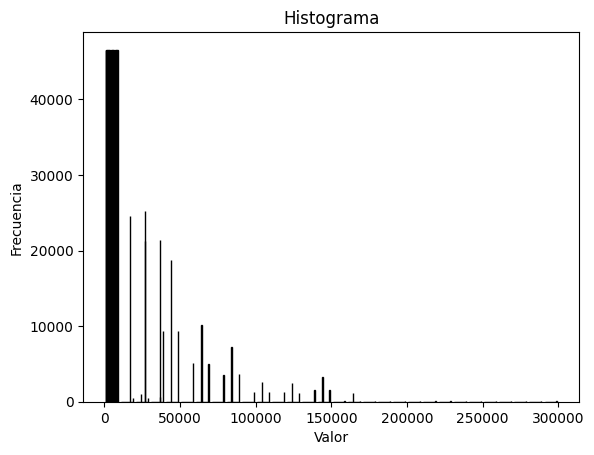

In [35]:
plt.hist(df_LabelEncoder, bins=30, edgecolor='black')
plt.title('Histograma')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

***Nota:***
*El histograma muestra que los datos tienen una distribución asimétrica con sesgo a la derecha.*

***Observación:***
*Para algunos modelos como **SVM**, podría ser recomendable intentar normalizar nuestra **x(características o variables independientes)** utilizando **log(x)**.*

### Matriz de correlación

In [36]:
correlacion = df_LabelEncoder.corr(numeric_only=True)
# Filtra la matriz de correlación para mantener solo los valores que son mayores
corr_mayores_70 = correlacion[(correlacion > 0.70) | (correlacion < -0.70)]
correlacion_miembro = correlacion['miembro']

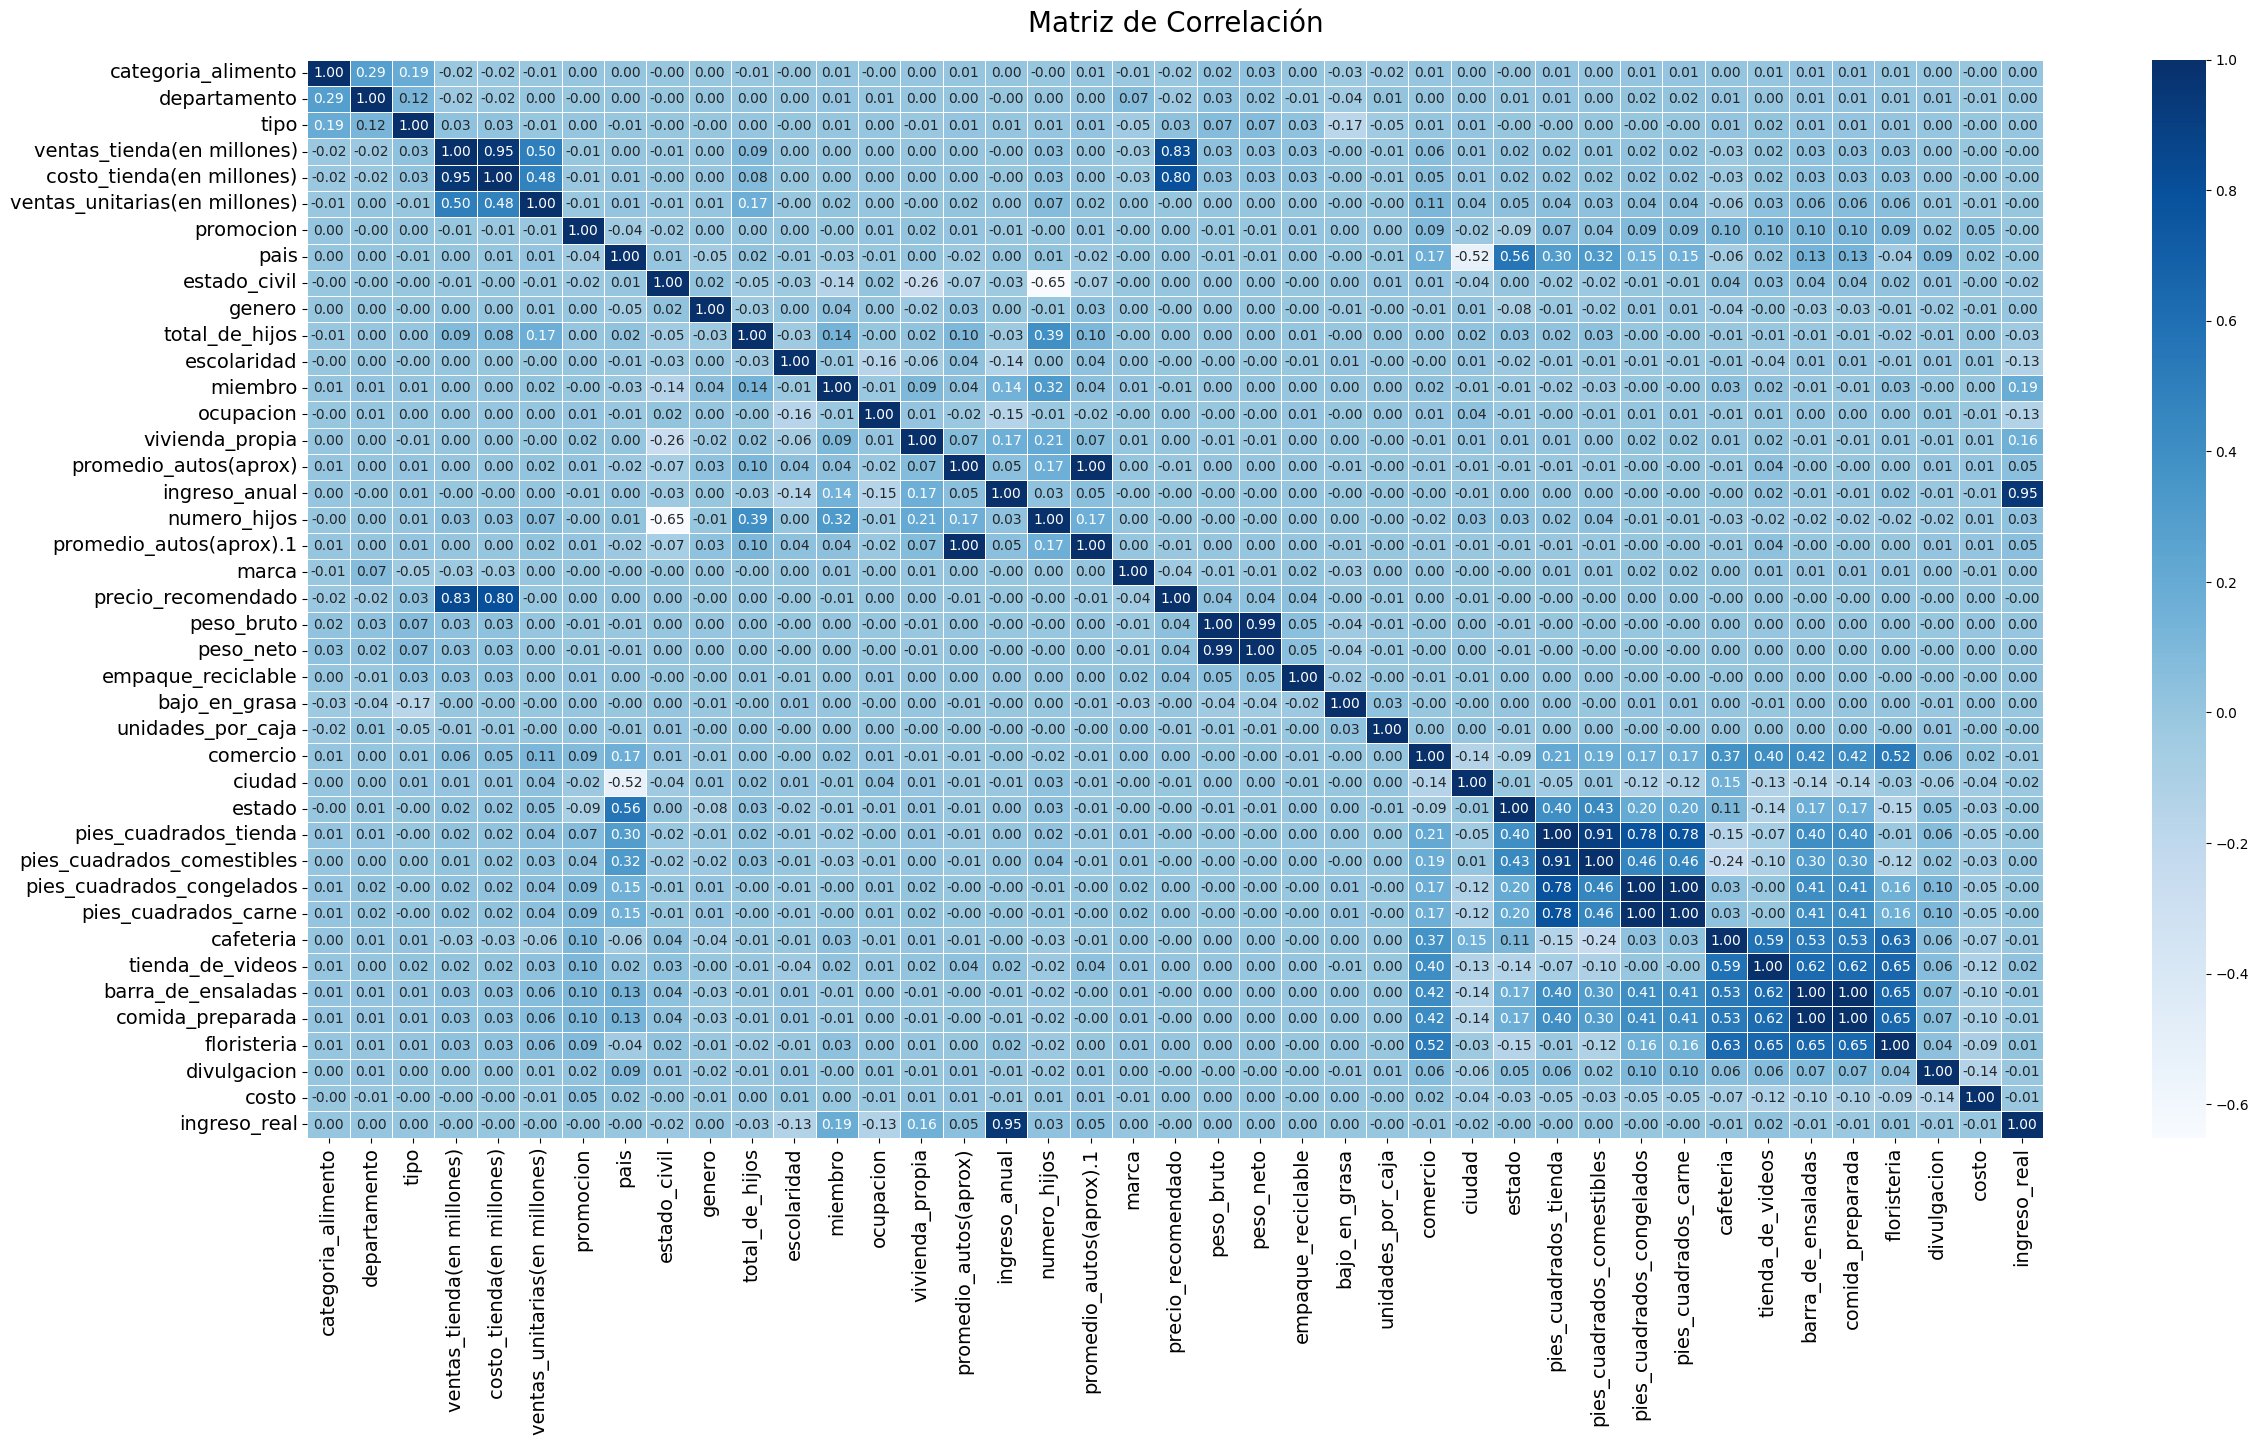

In [37]:
# Configura el tamaño del gráfico
plt.figure(figsize=(28, 14))
# mapa de calor
sns.heatmap(correlacion, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación', fontsize=20, pad=20)
# Aumentar el tamaño de las etiquetas de los ticks en el eje X
plt.xticks(fontsize=14)
# Aumentar el tamaño de las etiquetas de los ticks en el eje Y
plt.yticks(fontsize=14)

plt.show()


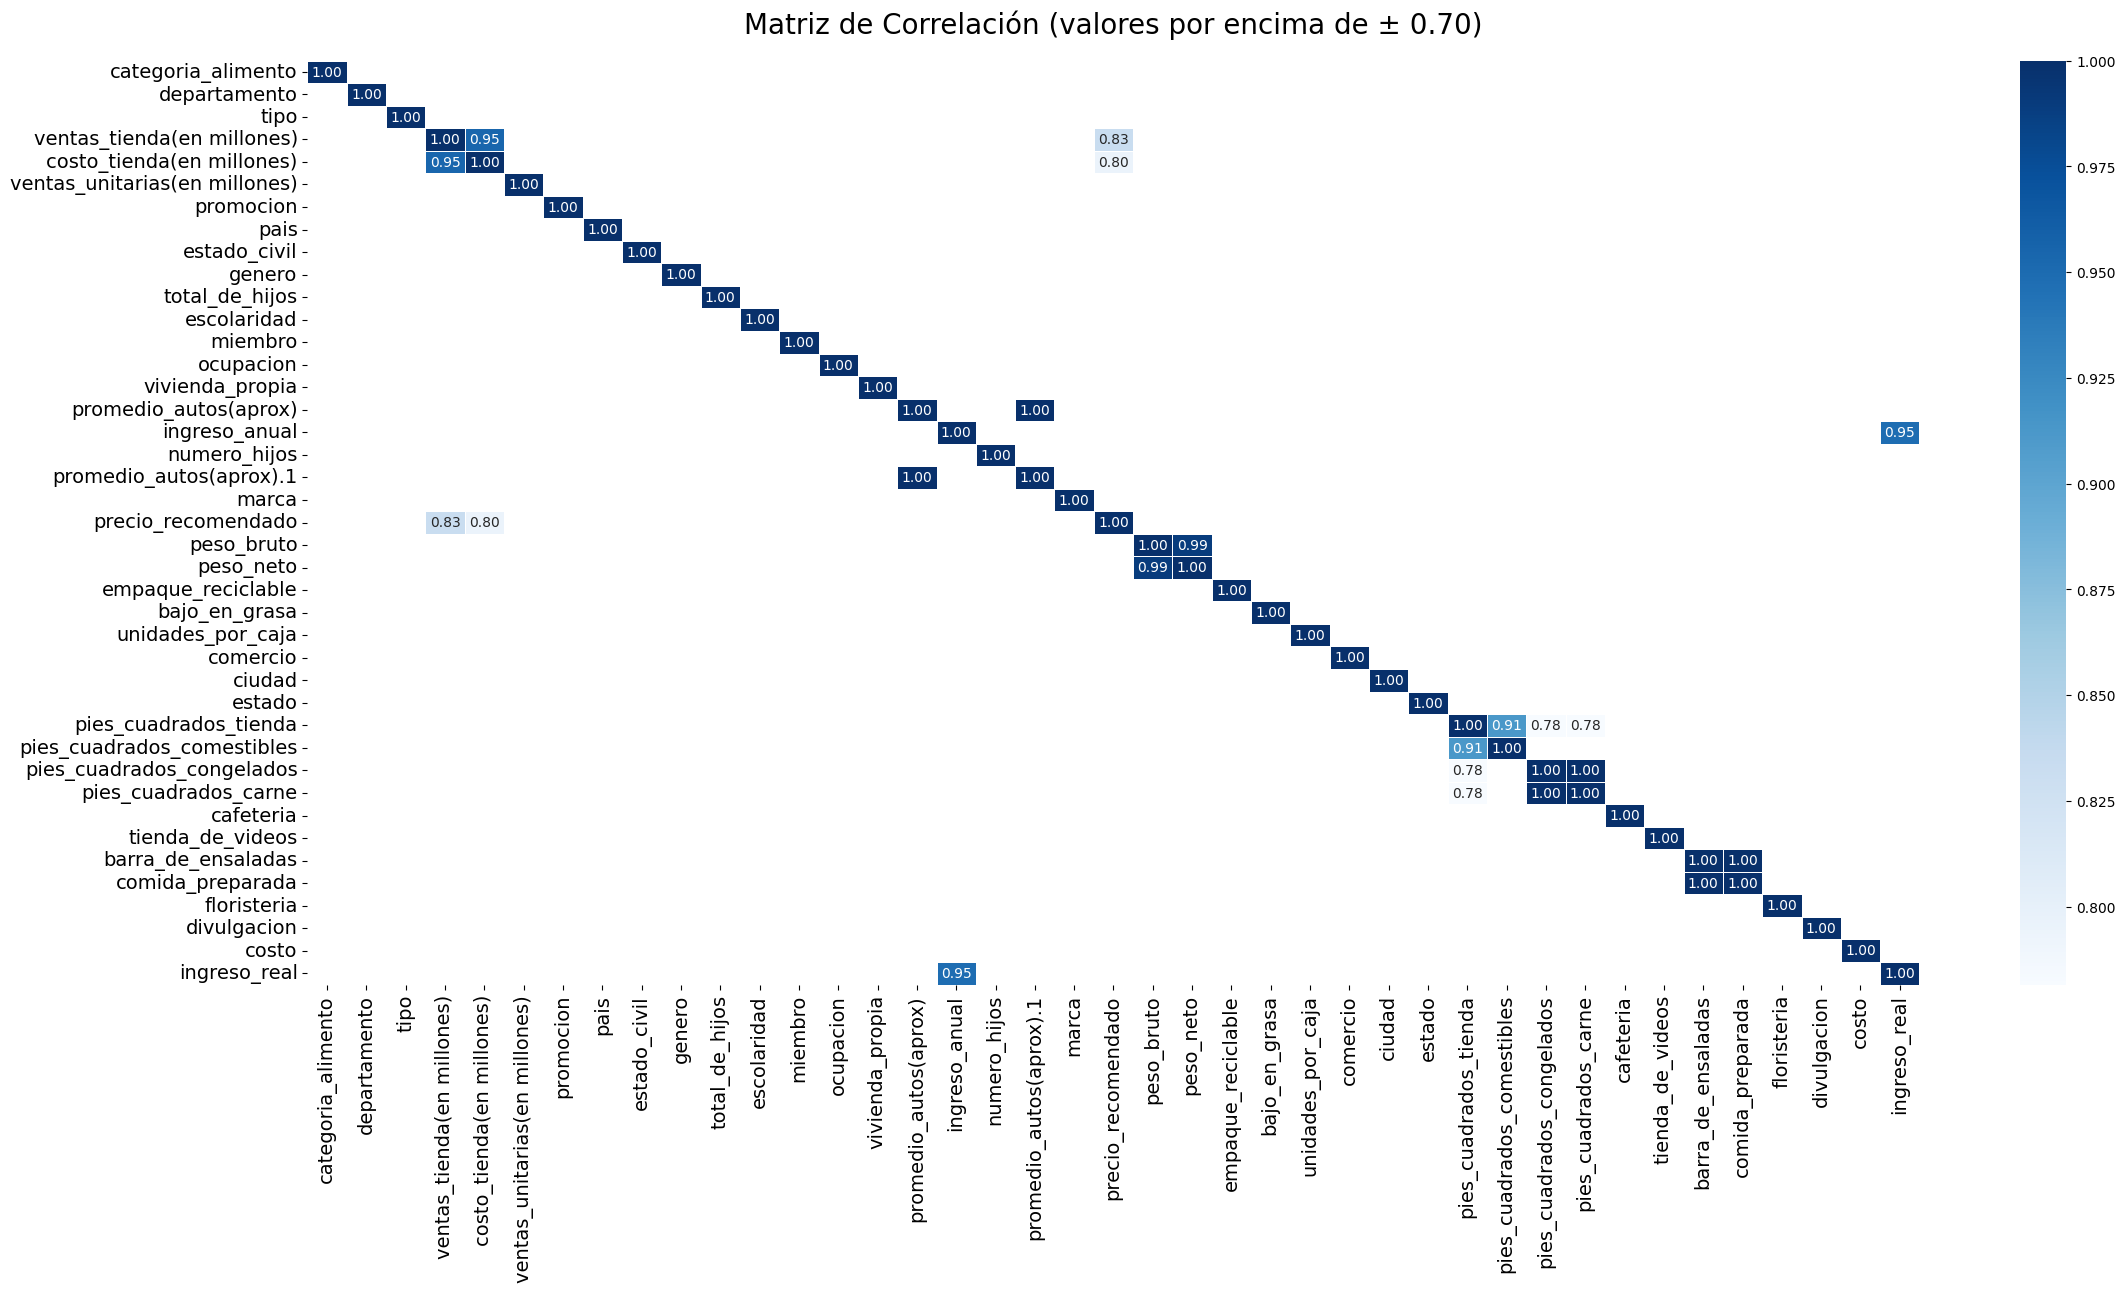

In [38]:
# Configura el tamaño del gráfico
plt.figure(figsize=(26, 12))
# mapa de calor
sns.heatmap(corr_mayores_70, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación (valores por encima de ± 0.70)', fontsize=20, pad=20)
# Aumentar el tamaño de las etiquetas de los ticks en el eje X
plt.xticks(fontsize=14)
# Aumentar el tamaño de las etiquetas de los ticks en el eje Y
plt.yticks(fontsize=14)

plt.show()

In [39]:
# nombres de las columnas con correlacion diferentes de 1.00
mask = (corr_mayores_70 != 1.00) & (corr_mayores_70.abs() >= 0.7)
col_corr = corr_mayores_70.columns[(mask.any(axis=0)) | (mask.any(axis=1))].tolist()
col_corr

['ventas_tienda(en millones)',
 'costo_tienda(en millones)',
 'ingreso_anual',
 'precio_recomendado',
 'peso_bruto',
 'peso_neto',
 'pies_cuadrados_tienda',
 'pies_cuadrados_comestibles',
 'pies_cuadrados_congelados',
 'pies_cuadrados_carne',
 'ingreso_real']

**correlacion con la variable dependiente u objetivo (miembro)**

**Predicción Fuerte:** Una variable explicativa altamente correlacionada con la variable objetivo suele ser un buen predictor. Esto significa que al incluirla en el modelo, puedes mejorar su capacidad para predecir la variable objetivo.

**Significancia Estadística:** Las variables con alta correlación suelen ser estadísticamente significativas, lo que indica que tienen una relación significativa con la variable objetivo y no es probable que su asociación sea producto del azar.

In [40]:
# columnas que tienen una correlación con 'miembro'
mask_miembro = (corr_mayores_70['miembro'].abs() >= 0.5) & (corr_mayores_70['miembro'] != 1.0)
miembro_corr = corr_mayores_70.columns[mask_miembro].tolist()
miembro_corr

[]

***Nota:*** *No hay variables explicativas o independientes que estén altamente correlacionadas con la variable dependiente u objetivo.*

# 4. **Segmentación de datos y Baseline**

In [41]:
correlacion_miembro = correlacion_miembro.sort_values(ascending=False)
top_10_positivas = correlacion_miembro.head(10)
top_10_negativas = correlacion_miembro.tail(10)
print(f"Top 10 variables con correlación + con 'miembro': \n{top_10_positivas}")
# print(top_10_positivas)
print(f"\nTop 10 variables con correlación - con 'miembro': \n{top_10_negativas}")
# print(top_10_negativas)

Top 10 variables con correlación + con 'miembro': 
miembro                    1.000000
numero_hijos               0.317011
ingreso_real               0.185090
ingreso_anual              0.142252
total_de_hijos             0.135060
vivienda_propia            0.093033
genero                     0.044753
promedio_autos(aprox).1    0.041982
promedio_autos(aprox)      0.041982
cafeteria                  0.034939
Name: miembro, dtype: float64

Top 10 variables con correlación - con 'miembro': 
ciudad                       -0.005293
barra_de_ensaladas           -0.008025
comida_preparada             -0.008025
escolaridad                  -0.013238
ocupacion                    -0.013412
estado                       -0.014557
pies_cuadrados_tienda        -0.023179
pais                         -0.027790
pies_cuadrados_comestibles   -0.030455
estado_civil                 -0.143750
Name: miembro, dtype: float64


### Selección de Features

In [42]:
# columnas seleccionadas
atributos = ['ocupacion', 'numero_hijos', 'genero', 'promocion', 'pais',
             'ingreso_real', 'escolaridad', 'promedio_autos(aprox)', 'estado',
             'estado_civil']

In [43]:
# obtener las columnas seleccioadas del df_LabelEncoder
df_atributos = df_LabelEncoder[atributos]
df_atributos.head()

,ocupacion,numero_hijos,genero,promocion,pais,ingreso_real,escolaridad,promedio_autos(aprox),estado,estado_civil
12,2,0.0,1,39,0,28069,1,1.0,0,1
31,2,1.0,1,15,1,14615,1,2.0,7,0
72,2,0.0,1,45,2,12823,1,1.0,2,1
74,4,0.0,1,30,2,25186,1,1.0,2,0
79,4,0.0,0,41,2,18980,1,1.0,2,1


In [44]:
from sklearn.model_selection import train_test_split

# divide los datos en entrenamiento y prueba
x = df_atributos
y = df_LabelEncoder['miembro']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
x.shape, y.shape

((46561, 10), (46561,))

In [ ]:
df_concat = pd.concat([x, y], axis=1)

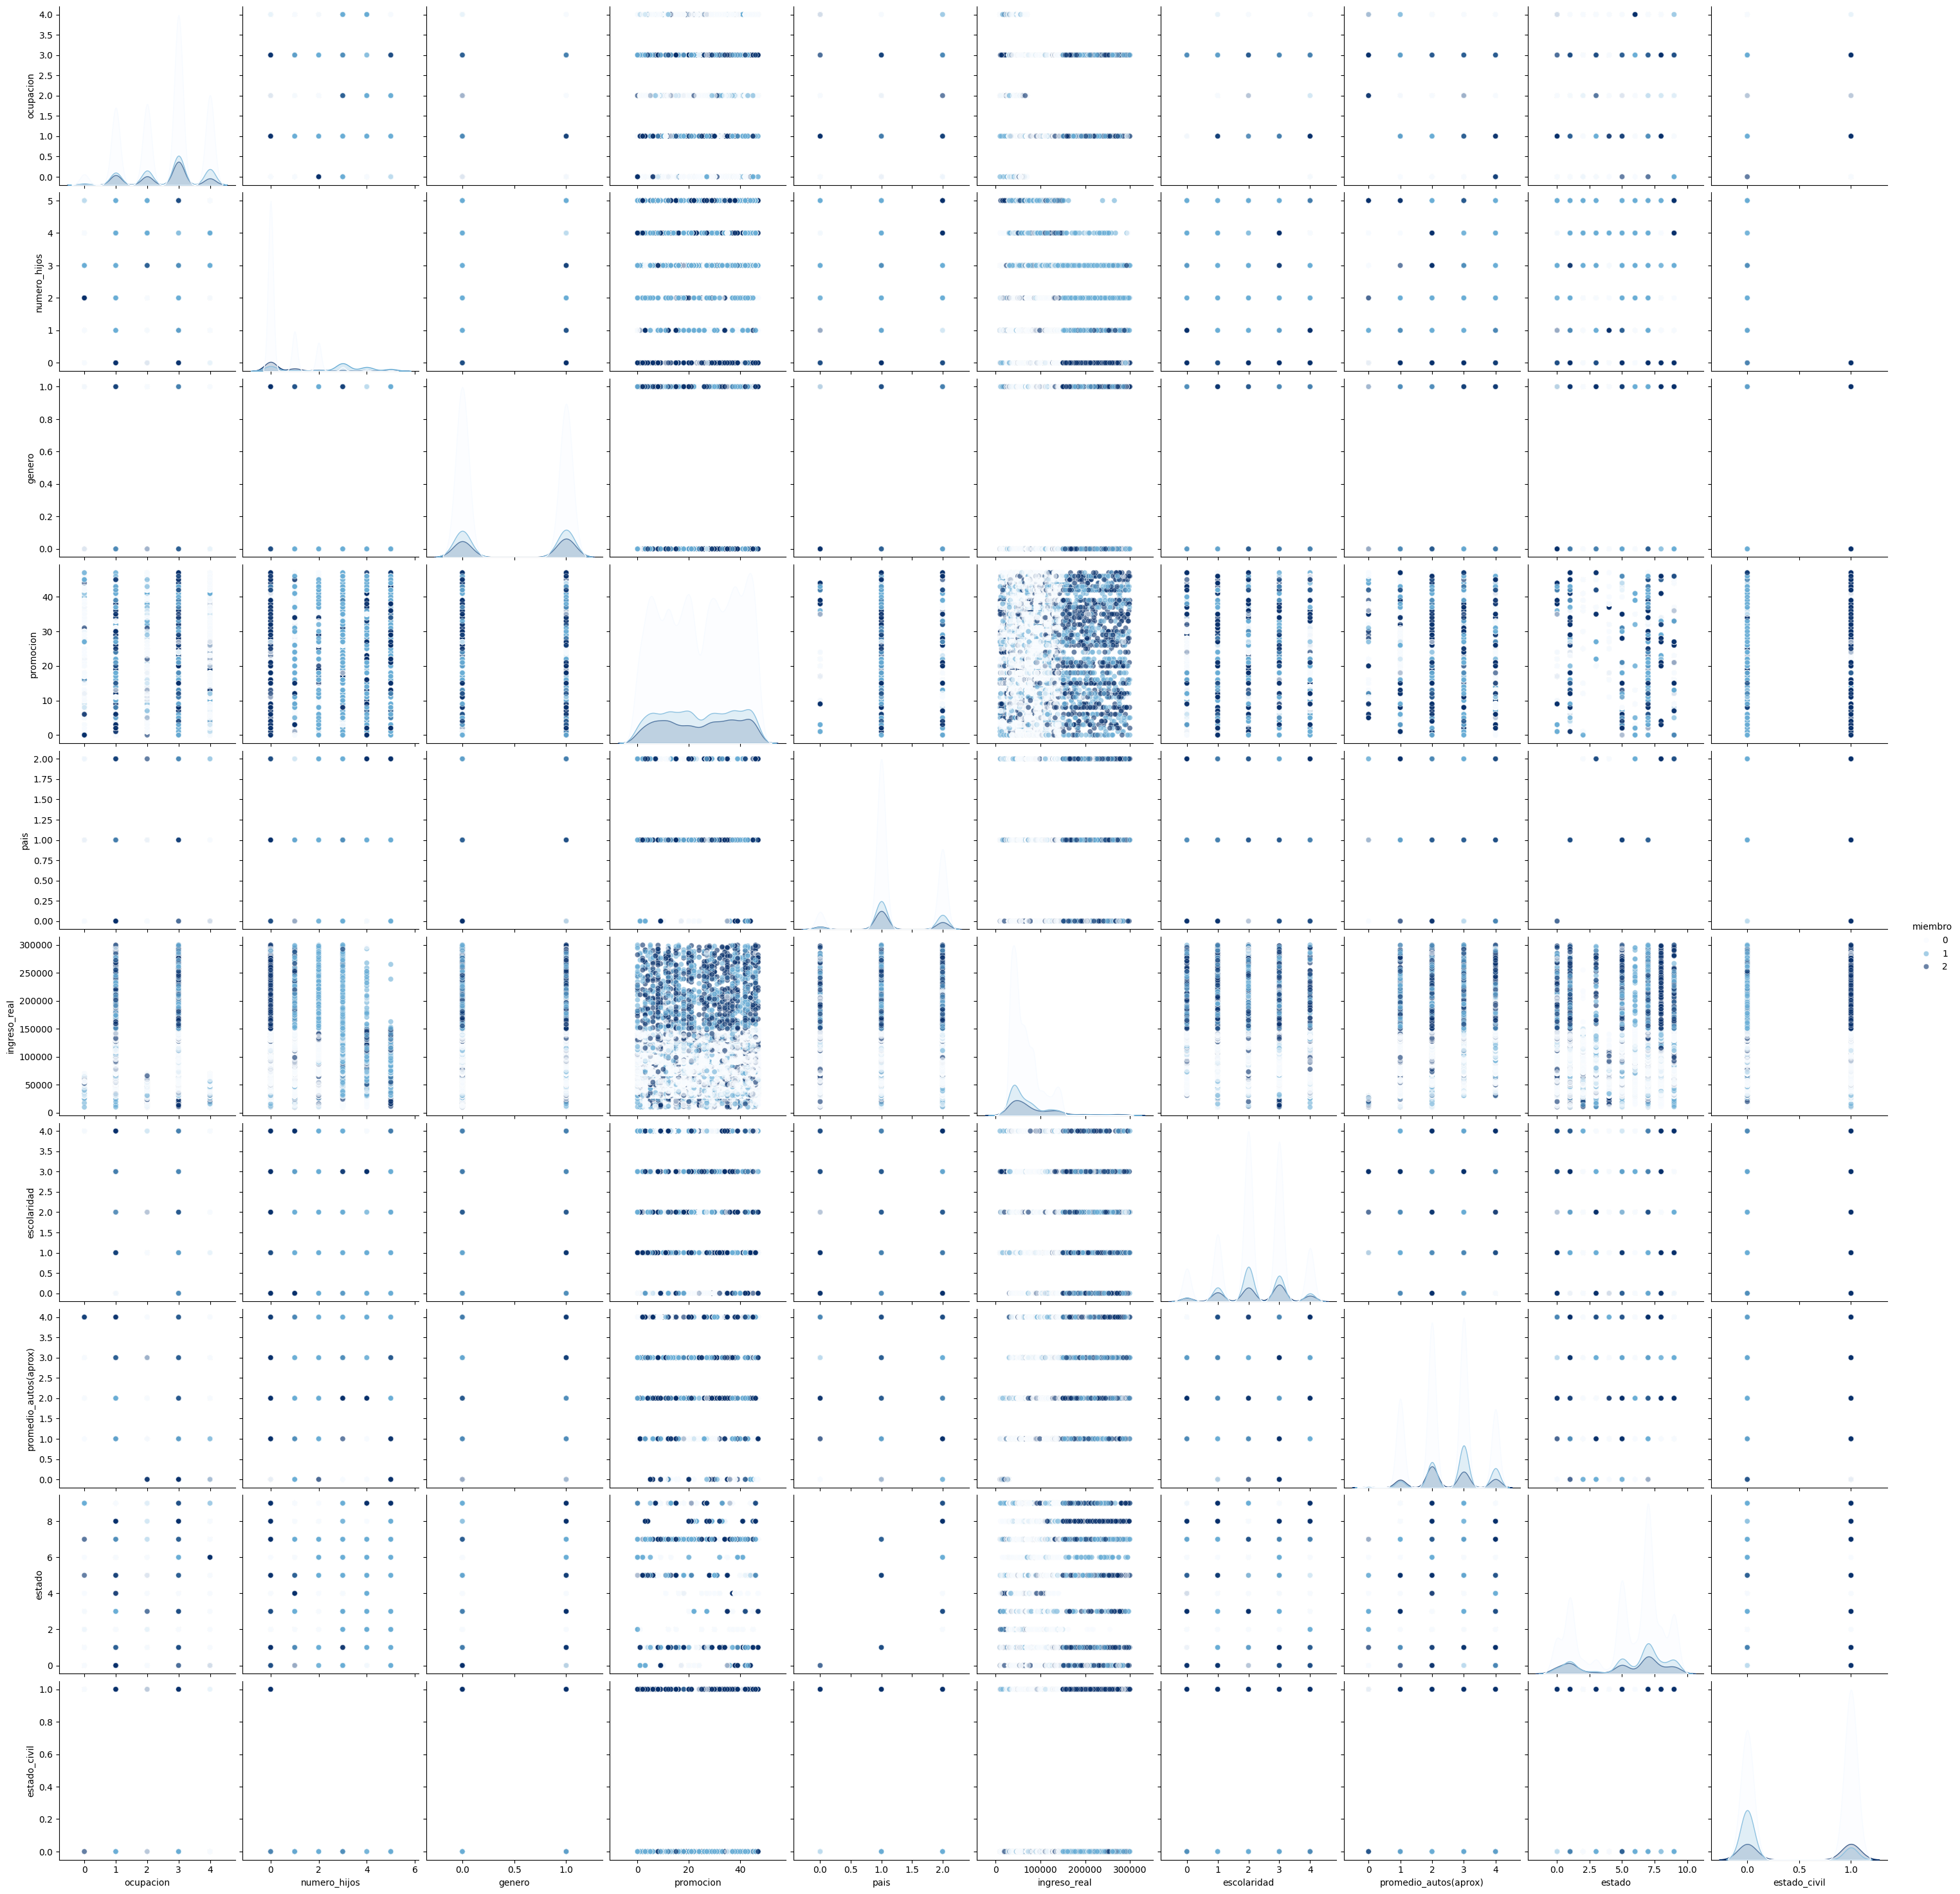

In [ ]:
sns.pairplot(
    df_concat,           # El DataFrame que contiene los datos a graficar
    hue='miembro',       # Variable para distinguir las clases con diferentes colores
    palette='Blues',     # Paleta de colores utilizada para las diferentes clases (tonos de azul en este caso)
    height=3,            # Altura (en pulgadas) de cada gráfico individual en la matriz del pairplot
    plot_kws={'alpha':0.6},  # Parámetros adicionales para los gráficos; en este caso, alpha ajusta la transparencia de los puntos (0.6 = 60% opaco)
    diag_kind='kde',     # Especifica el tipo de gráfico en la diagonal; 'kde' genera un gráfico de densidad (Kernel Density Estimation)
)

plt.show()

1. **Distribución Univariada**:
   - Los gráficos de la diagonal principal representan la distribución univariada de cada variable, utilizando gráficos de densidad o histogramas.
   - Algunas variables parecen tener distribuciones no uniformes, con picos pronunciados, lo que sugiere que ciertos valores son más frecuentes.
   - Por ejemplo, algunas variables pueden estar muy concentradas en valores específicos, lo que podría indicar la presencia de categorías o clases dominantes.

2. **Relaciones Bivariadas**:
   - Los gráficos fuera de la diagonal son gráficos de dispersión que muestran las relaciones entre pares de variables.
   - **Linealidad**: No se observa una clara relación lineal fuerte entre muchas de las variables, ya que la mayoría de las gráficas de dispersión no muestran una forma clara como una línea recta, sino más bien puntos dispersos.
   - **Agrupaciones**: En algunas combinaciones de variables, se pueden ver agrupaciones de puntos, lo que podría indicar la presencia de clases diferentes dentro de los datos.

3. **Distribuciones Multimodales**:
   - Algunas de las distribuciones univariadas (en la diagonal) tienen más de un pico, lo que podría sugerir la existencia de varias subpoblaciones o clusters dentro de esas variables.

**Posible Desbalance de Clases**:
   - en algunos de los gráficos de dispersión se puede observar diferente cantidad de ciertos colores, podría indicar que las clases están desbalanceadas.

**Elección de Kernel para SVM**:
   - Dada la ausencia de una clara linealidad y la presencia de solapamiento entre clases, un kernel no lineal (como `rbf` o `poly`) podría ser más adecuado para capturar las complejidades en los datos y mejorar la capacidad del modelo para separar las clases.
   - Sin embargo, esta elección debe ser validada con pruebas cruzadas o con una búsqueda de hiperparámetros (`GridSearchCV` o `RandomizedSearchCV`).

**Posibles Interacciones**:
   - Aunque algunas variables pueden no mostrar relaciones evidentes de forma directa, puede haber interacciones más complejas entre varias variables que podrían ser modeladas mejor con un SVM no lineal o incluso con modelos más complejos como redes neuronales.

Desvalanceo de clases

In [ ]:
df_LabelEncoder.miembro.value_counts()

,count
miembro,
0,33807
1,7556
2,5198


### Baseline

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
def modelo_clasificacion(x_train, x_test, y_train, y_test, modelo):
    """
    Entrena un modelo de clasificación y evalúa su rendimiento con las metricas de exactitud, precisión y sensibilidad.

    Esta función ajusta el modelo proporcionado a los datos de entrenamiento, realiza predicciones en los datos de prueba
    y calcula las métricas de rendimiento: exactitud, precisión y sensibilidad.

    Parámetros:
    x_train (array-like o pd.DataFrame): Características de entrenamiento.
    x_test (array-like o pd.DataFrame): Características de prueba.
    y_train (array-like o pd.Series): Etiquetas de entrenamiento.
    y_test (array-like o pd.Series): Etiquetas de prueba.
    modelo (sklearn.base.BaseEstimator): El modelo de clasificación a entrenar.

    Imprime:
    - Exactitud del modelo en porcentaje.
    - Precisión del modelo en porcentaje.
    - Sensibilidad del modelo en porcentaje.

    Ejemplo:
    >>> from sklearn.ensemble import RandomForestClassifier
    >>> modelo = RandomForestClassifier()
    >>> modelo_clasificacion(X_train, X_test, y_train, y_test, modelo)
    """
    start_time = time.time()

    # Ajusta el modelo a los datos de entrenamiento
    model = modelo
    model.fit(x_train, y_train)

    # Realiza predicciones en los datos de prueba
    y_pred = model.predict(x_test)

    # Calcula las métricas de rendimiento
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Imprime los resultados
    print(f'La Exactitud del modelo es: {accuracy * 100:.2f}%')
    print(f'La Precisión del modelo es: {precision * 100:.2f}%')
    print(f'La Sensibilidad del modelo es: {recall * 100:.2f}%')

    end_time = time.time()
    execution_time = round((end_time - start_time),2)

    return accuracy, precision, recall, execution_time

In [ ]:
# modelo_metricas = pd.DataFrame(columns=['Modelo', 'Exactitud', 'Precisión', 'Sensibilidad', 'Tiempo_ejecucion', 'Tiempo_busqueda_hiperparametros'])
modelo_metricas = pd.read_csv('/content/drive/MyDrive/Data_Science/Bootcamp Data Science/Challenge/ESENCIA DEL CLIENTE /modelo_metricas.csv')
modelo_metricas.head()

,Modelo,Exactitud,Precisión,Sensibilidad,Tiempo_ejecucion,Tiempo_busqueda_hiperparametros
0,Baseline DecisionTreeClassifier,95.16,95.18,95.16,0.29,0.30
1,DecisionTreeClassifier,96.05,96.03,96.05,0.28,13.46
2,RandomForestClassifier,96.85,96.83,96.85,3.47,232.08
3,Máquinas de Soporte Vectorial (SVM),90.44,91.97,90.44,239.64,6711.94
4,K-Nearest Neighbors (KNN),96.96,96.96,96.96,6.18,338.94


In [ ]:
def metricas_df(accuracy, precision, recall, modelo_name, tiempo, Tiempo_busqueda):
    """
    Muestra las métricas de rendimiento: exactitud, precisión y sensibilidad en un DataFrame.

    Esta función actualiza un DataFrame global `modelo_metricas` con las métricas de rendimiento
    de un modelo específico. Las métricas calculadas son la exactitud, precisión y sensibilidad
    (recall). Si el modelo ya está presente en el DataFrame global, se actualiza la fila existente;
    de lo contrario, se añade una nueva fila.

    Args:
        accuracy (float): Puntaje de exactitud del modelo. Debe estar en el rango [0, 1].
        precision (float): Puntaje de precisión del modelo. Debe estar en el rango [0, 1].
        recall (float): Puntaje de sensibilidad (recall) del modelo. Debe estar en el rango [0, 1].
        modelo_name (str): Nombre del modelo para identificar la fila en el DataFrame.
        tiempo (float): Tiempo de ejecución del modelo.
        Tiempo_busqueda (float): Tiempo de búsqueda de hiperparámetros.

    Returns:
        pd.DataFrame: DataFrame global `modelo_metricas` actualizado con las métricas del modelo.

    Example:
        >>> metricas_df(accuracy=0.95, precision=0.93, recall=0.92, modelo_name='Modelo A', tiempo=5.0, Tiempo_busqueda=2.0)
        Modelo  Exactitud  Precisión  Sensibilidad  Tiempo_ejecucion  Tiempo_busqueda_hiperparametros
        0  Modelo A     95.00      93.00         92.00               5.0                          2.0
    """
    global modelo_metricas

    # Calcula las métricas de rendimiento
    accuracy = round(accuracy * 100, 2)
    precision = round(precision * 100, 2)
    recall = round(recall * 100, 2)

    # Crear un DataFrame temporal con las métricas del modelo actual
    df_metricas = pd.DataFrame({
        'Modelo': [modelo_name],
        'Exactitud': [accuracy],
        'Precisión': [precision],
        'Sensibilidad': [recall],
        'Tiempo_ejecucion': [tiempo],
        'Tiempo_busqueda_hiperparametros': [Tiempo_busqueda]
    })

    # Eliminar columnas vacías o NA en el DataFrame temporal
    df_metricas = df_metricas.dropna(axis=1, how='all')

    # Actualiza el DataFrame global
    if modelo_name in modelo_metricas['Modelo'].values:
        # Actualizar fila existente
        index = modelo_metricas[modelo_metricas['Modelo'] == modelo_name].index[0]
        modelo_metricas.loc[index] = df_metricas.iloc[0]
    else:
        # Añadir nueva fila
        modelo_metricas = modelo_metricas.dropna(axis=1, how='all')
        modelo_metricas = pd.concat([modelo_metricas, df_metricas], ignore_index=True)

    # Guardar el DataFrame actualizado en un archivo CSV
    archivo_csv = '/content/drive/MyDrive/Data_Science/Bootcamp Data Science/Challenge/ESENCIA DEL CLIENTE /modelo_metricas.csv'
    modelo_metricas.to_csv(archivo_csv, index=False)

    # Devuelve el DataFrame global actualizado
    return modelo_metricas



In [ ]:
# modelo de arbol sin Hiperparámetros (baseline)
start_time = time.time()

dtc = DecisionTreeClassifier(random_state=42)
accuracy_s, precision_s, recall_s, t_ejecucion = modelo_clasificacion(x_train, x_test, y_train, y_test, dtc)

end_time = time.time()
execution_time = round((end_time - start_time),2)


La Exactitud del modelo es: 95.16%
La Precisión del modelo es: 95.18%
La Sensibilidad del modelo es: 95.16%


In [ ]:
metricas_df(accuracy_s, precision_s, recall_s, 'Baseline DecisionTreeClassifier', t_ejecucion, execution_time)

,Modelo,Exactitud,Precisión,Sensibilidad,Tiempo_ejecucion,Tiempo_busqueda_hiperparametros
0,Baseline DecisionTreeClassifier,95.16,95.18,95.16,0.29,0.3


***Nota:***
*La línea base es un **árbol de decisión sin ajuste de hiperparámetros**, y se obtienen una exactitud, precisión y sensibilidad de alrededor del 95.16%.*

- Con un modelo más complejo o ajustado, el modelo estaría superando la línea base, lo que es una señal positiva.

# 5. **Modelado y validación**

### Hiperparámetros

`GridSearchCV` es una herramienta en `scikit-learn` que se utiliza para automatizar el proceso de ajuste de hiperparámetros de un modelo de machine learning. Su objetivo es encontrar la combinación óptima de hiperparámetros que maximice el rendimiento del modelo.

**Validación cruzada**: Para cada combinación de hiperparámetros, `GridSearchCV` entrena el modelo y evalúa su rendimiento utilizando validación cruzada. La validación cruzada consiste en dividir el conjunto de datos en varios subconjuntos (o "folds"), entrenar el modelo en algunos de esos subconjuntos y evaluarlo en los restantes. Esto ayuda a estimar cómo funcionará el modelo en datos no vistos.

- **Selección del mejor modelo**: Después de probar todas las combinaciones de hiperparámetros, `GridSearchCV` selecciona la combinación que produce el mejor rendimiento (según la métrica que especifiques, como `accuracy` o `f1-score`).


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
tree = DecisionTreeClassifier()

# hiperparámetros
param_grid = {
    'max_depth': [20, 50, 100],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5],
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced'],
    'ccp_alpha': [0.0, 0.01, 0.1]
}

grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# mejor modelo
best_tree = grid_search.best_estimator_
best_params = grid_search.best_params_

In [ ]:
best_tree

DecisionTreeClassifier(criterion='entropy', max_depth=100)

In [ ]:
# Evaluar el mejor modelo
print(f"Mejor combinación de hiperparámetros: {grid_search.best_params_}")
print(f"Mejor exactitud obtenida: {grid_search.best_score_}")

Mejor combinación de hiperparámetros: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mejor exactitud obtenida: 0.9485763873542444


In [ ]:
# modelo cn max_depth de 50
mejor_tree_hiperparametros = DecisionTreeClassifier(criterion='entropy', max_depth=50, min_samples_leaf=1, min_samples_split=2, random_state=42)

accuracy_dtc, precision_dtc, recall_dtc, t_dtc = modelo_clasificacion(x_train, x_test, y_train, y_test, mejor_tree_hiperparametros)

La Exactitud del modelo es: 95.75%
La Precisión del modelo es: 95.75%
La Sensibilidad del modelo es: 95.75%


In [ ]:
mejor_tree_hiperparametros = DecisionTreeClassifier(**best_params, random_state=42)

best_accuracy, best_precision, best_recall, best_t_dtc = modelo_clasificacion(x_train, x_test, y_train, y_test, mejor_tree_hiperparametros)

La Exactitud del modelo es: 95.75%
La Precisión del modelo es: 95.75%
La Sensibilidad del modelo es: 95.75%


***Nota:***
*El modelo de arbol de decicion con los mejores **hiperparámetros ('ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 100, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2)** según GridSearchCV.*

supera la baseline por alredor de 0.50

### Otros modelos **califlicacion multiclase**

considerare los siguientes modelos de califlicacion multiclase, como experimentacion para encontrar el mejor modelo:

1. **Árbol de Decisión (Decision Tree)**
2. **Bosques Aleatorios (Random Forest)**
3. **Máquinas de Soporte Vectorial (SVM)**
4. **K-Nearest Neighbors (KNN)**
5. **Gradient Boosting (GBM)**
6. **Red Neuronal Artificial (MLPClassifier)**

**Consideraciones:**

**Preprocesamiento de Datos:** Algunos modelos como SVM y MLPClassifier pueden requerir que los datos estén normalizados o escalados.

**Normaliza las características:** La normalización de características puede mejorar la eficiencia y precisión de el modelo de clasificación.

---

**Nota:** Dado que experimentar con la creación de estos modelos puede ser un proceso bastante lento y consume recursos importantes, y considerando que estoy trabajando en el ambiente de Google Colaboratory, donde los recursos son limitados, **utilizaré**:

- **RandomizedSearchCV**
    - Validación cruzada (**cv**) = 3
    - Número máximo de iteraciones o combinaciones (**n_iter**) = 50

**Esto es debido a los problemas observados con los tiempos de ejecución.**
    - esto solo ocurre con algunos modelos.

Sin embargo, dado que el conjunto de datos que se está manejando se podría considerar de tamaño mediano, **lo recomendable en un entorno con más recursos sería**:

- **RandomizedSearchCV**
    - Validación cruzada (**cv**) = 5
    - Número máximo de iteraciones o combinaciones (**n_iter**) = 100

Esto permitiría una búsqueda más exhaustiva y una evaluación más robusta del modelo.

---



In [19]:
# Modelos
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
# Estandarizar
from sklearn.preprocessing import StandardScaler

**Estandarizar atributos**

In [ ]:
sscaler = StandardScaler()

x_train_scaled = sscaler.fit_transform(x_train)
x_test_scaled = sscaler.transform(x_test)

### **Probando modelos**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

`RandomizedSearchCV` es una alternativa que, en lugar de explorar todas las combinaciones posibles, selecciona un número fijo de combinaciones al azar (n_iter). Esto puede ser mucho más rápido en problemas de alta dimensionalidad de hiperparámetros.

In [ ]:
def search_best_model(x, y, modelo, param_grid, cv=3, iter=50):
    """
    Encuentra el mejor modelo y sus mejores hiperparámetros utilizando una búsqueda aleatoria.

    Esta función realiza una búsqueda aleatoria sobre un conjunto de hiperparámetros para encontrar
    el mejor modelo basado en la precisión ('accuracy') usando validación cruzada.

    Parámetros:
    x (array-like o pd.DataFrame): Características de entrada para el modelo.
    y (array-like o pd.Series): Etiquetas o valores de destino para el modelo.
    modelo (sklearn.base.BaseEstimator): El modelo de aprendizaje automático a ajustar.
    param_grid (dict): Un diccionario que contiene los hiperparámetros a probar. Las claves son
                       los nombres de los hiperparámetros y los valores son listas de valores posibles.
    cv (int, opcional): Número de particiones en la validación cruzada. Por defecto es 3.
    iter (int, opcional): Número de iteraciones de la búsqueda aleatoria. Por defecto es 50.

    Retorna:
    tuple: Un par que contiene:
        - best_model (sklearn.base.BaseEstimator): El mejor modelo encontrado basado en los hiperparámetros.
        - best_params (dict): El diccionario de los mejores hiperparámetros encontrados.

    Imprime:
    - Tiempo de ejecución en segundos.

    Ejemplo:
    >>> from sklearn.ensemble import RandomForestClassifier
    >>> from sklearn.model_selection import RandomizedSearchCV
    >>> param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [None, 10, 20]}
    >>> modelo = RandomForestClassifier()
    >>> best_model, best_params = search_best_model(X_train, y_train, modelo, param_grid)
    """
    start_time = time.time()

    search= RandomizedSearchCV(modelo, param_grid, cv=cv,
                                           scoring='accuracy', n_iter=iter, n_jobs=-1,
                                           random_state=42)
    search.fit(x, y)

    best_model = search.best_estimator_
    best_params = search.best_params_

    end_time = time.time()
    execution_time = round((end_time - start_time),2)
    print(f"Tiempo de ejecución: {execution_time} segundos")

    return best_model, best_params, execution_time

#### 1 Árbol de Decisión (Decision Tree)

In [ ]:
arbol = DecisionTreeClassifier(**best_params, random_state=42)
accuracy_dtc, precision_dtc, recall_dtc, t_dtc = modelo_clasificacion(x_train_scaled, x_test_scaled, y_train, y_test, arbol)

La Exactitud del modelo es: 95.74%
La Precisión del modelo es: 95.74%
La Sensibilidad del modelo es: 95.74%


***Nota:***
*Con las caracteristicas normalizadas el **modelo DecisionTreeClassifier()** con sus mejores **parametros según GridSearchCV**, se obtienen practicamente los mismos resultados que con las variablres sin standarización.*

In [ ]:
# utilizando RandomizedSearchCV
dtc = DecisionTreeClassifier()

best_model_dtc, best_params_dtc, tiempo = search_best_model(x_train_scaled, y_train, dtc, param_grid)

Tiempo de ejecución: 13.46 segundos


In [ ]:
best_model_dtc

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=100)

In [ ]:
print(f"Mejor combinación de hiperparámetros: {best_params_dtc}")

Mejor combinación de hiperparámetros: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 100, 'criterion': 'entropy', 'class_weight': 'balanced', 'ccp_alpha': 0.0}


In [ ]:
best_dtc = DecisionTreeClassifier(**best_params_dtc, random_state=42)
accuracy_dtc, precision_dtc, recall_dtc, t_dtc1 = modelo_clasificacion(x_train_scaled, x_test_scaled, y_train, y_test, best_dtc)

La Exactitud del modelo es: 96.05%
La Precisión del modelo es: 96.03%
La Sensibilidad del modelo es: 96.05%


In [ ]:
best_dtc = DecisionTreeClassifier(**best_params_dtc, random_state=42)
accuracy_dtc, precision_dtc, recall_dtc, t_dtc2 = modelo_clasificacion(x_train, x_test, y_train, y_test, best_dtc)

La Exactitud del modelo es: 96.05%
La Precisión del modelo es: 96.03%
La Sensibilidad del modelo es: 96.05%


In [ ]:
metricas_df(accuracy_dtc, precision_dtc, recall_dtc, 'DecisionTreeClassifier', t_dtc2, tiempo)

,Modelo,Exactitud,Precisión,Sensibilidad,Tiempo_ejecucion,Tiempo_busqueda_hiperparametros
0,Baseline DecisionTreeClassifier,95.16,95.18,95.16,0.29,0.30
1,DecisionTreeClassifier,96.05,96.03,96.05,0.28,13.46



**Nota:**

Utilizando **RandomizedSearchCV** y las variables sin ser estandarizadas, junto con los mejores hiperparámetros encontrados:

- `min_samples_split`: 2
- `min_samples_leaf`: 1
- `max_features`: None
- `max_depth`: 100
- `criterion`: 'entropy'
- `class_weight`: 'balanced'
- `ccp_alpha`: 0.0

El modelo **DecisionTreeClassifier()** obtuvo aproximadamente un **96%** en las métricas de **exactitud (accuracy_score)**, **precisión (precision_score)** y **sensibilidad (recall_score)**.

- **Exactitud** del modelo: 96.05%
- **Precisión** del modelo: 96.03%
- **Sensibilidad** del modelo: 96.05%

**supera la baseline por alrededor de 0.80%.**

---

#### 2 Bosques Aleatorios (Random Forest)

In [ ]:
random_forest = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [25, 50, 100],    # Número de árboles en el bosque
    'max_depth': [None, 10, 15, 20],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],  # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],    # Número mínimo de muestras en una hoja
    'max_features': ['sqrt', 'log2'], # Número de características a considerar en cada división
    'bootstrap': [True, False]        # Si utilizar o no el muestreo bootstrap
}

In [ ]:
best_model_rf, best_params_rf, tiempo_rf = search_best_model(x_train_scaled, y_train, random_forest, param_grid_rf)

Tiempo de ejecución: 222.18 segundos


In [ ]:
best_model_rf

RandomForestClassifier(bootstrap=False, max_features='log2',
                       min_samples_split=5, n_estimators=25)

In [ ]:
# Mejor modelo
print(f"Mejor combinación de hiperparámetros: {best_params_rf}")

Mejor combinación de hiperparámetros: {'n_estimators': 25, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}


In [ ]:
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)
accuracy_rf, precision_rf, recall_rf, t_rf1 = modelo_clasificacion(x_train_scaled, x_test_scaled, y_train, y_test, best_rf)

La Exactitud del modelo es: 97.11%
La Precisión del modelo es: 97.09%
La Sensibilidad del modelo es: 97.11%


---
**sin x scalado (standarScaler)**

In [ ]:
best_accuracy_rf, best_precision_rf, best_recall_rf, t_rf2 = modelo_clasificacion(x_train, x_test, y_train, y_test, best_rf)

La Exactitud del modelo es: 97.11%
La Precisión del modelo es: 97.09%
La Sensibilidad del modelo es: 97.11%


---
mejorando los parametros de **cv y n_iter en RandomizedSearchCV**


In [ ]:
best_model_rf, best_params_rf, time_rf2= search_best_model(x_train_scaled, y_train, random_forest, param_grid_rf, 5, 100)

Tiempo de ejecución: 878.75 segundos


In [ ]:
best_rf = RandomForestClassifier(**best_params_rf, random_state=42)
modelo_clasificacion(x_train_scaled, x_test_scaled, y_train, y_test, best_rf)

La Exactitud del modelo es: 96.74%
La Precisión del modelo es: 96.72%
La Sensibilidad del modelo es: 96.74%


(0.9674278760111675, 0.9671783891703963, 0.9674278760111675, 1.6)

In [ ]:
metricas_df(best_accuracy_rf, best_precision_rf, best_recall_rf, 'RandomForestClassifier', t_rf2, tiempo_rf)

---

**Nota:**

Utilizando **RandomizedSearchCV** y las variables sin estandarizar, el modelo **RandomForestClassifier()** con los siguientes hiperparámetros:

- `n_estimators`: 25
- `min_samples_split`: 5
- `min_samples_leaf`: 1
- `max_features`: 'log2'
- `max_depth`: None
- `bootstrap`: False

Obtuvo una puntuación aproximada del **97.10%** en las métricas de **exactitud (accuracy_score)**, **precisión (precision_score)** y **sensibilidad (recall_score)**. Al utilizar las variables estandarizadas, los resultados en las métricas fueron prácticamente idénticos.

**Métricas sin estandarizar:**

- **Exactitud** del modelo: 97.11%
- **Precisión** del modelo: 97.09%
- **Sensibilidad** del modelo: 97.11%


**supera la baseline por alrededor de 1.90%.**

---

#### Máquinas de Soporte Vectorial (SVM)

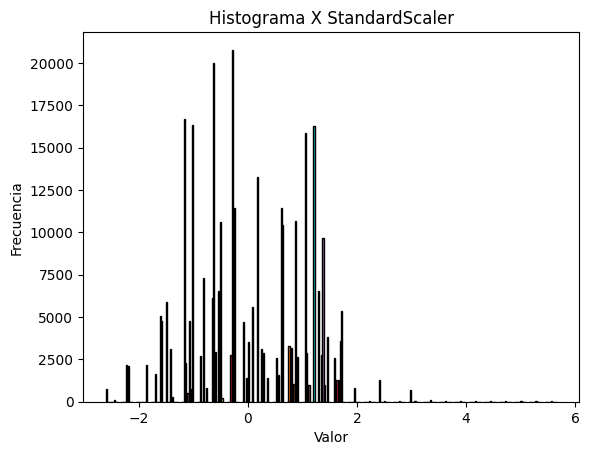

In [ ]:
plt.hist(x_train_scaled, bins=30, edgecolor='black')
plt.title('Histograma X StandardScaler')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

In [ ]:
svm = SVC()

param_grid_svm = {
    'C': [1, 10, 100],                    # Parámetro de regularización
    'kernel': ['rbf', 'poly'],            # Tipo de kernel a usar
    'gamma': ['scale', 'auto'],           # Coeficiente del kernel para 'rbf', 'poly'
    'degree': [2, 3, 4],                  # Grado del polinomio para el kernel 'poly'
    'class_weight': ['balanced']          # Ajuste de peso de clases
}

In [ ]:
best_model_svm, best_params_svm, tiempo_svm = search_best_model(x_train_scaled, y_train, svm, param_grid_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tiempo de ejecución: 6711.94 segundos


In [ ]:
best_model_svm

SVC(C=100, class_weight='balanced', degree=2)

In [ ]:
print(f"Mejor combinación de hiperparámetros: {best_params_svm}")

Mejor combinación de hiperparámetros: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'class_weight': 'balanced', 'C': 100}


- Modelo con mejores hiperparámetros

In [ ]:
best_svm = SVC(**best_params_svm, random_state=42)
accuracy_cvm, precision_cvm, recall_cvm, t_cvm = modelo_clasificacion(x_train_scaled, x_test_scaled, y_train, y_test, best_svm)

La Exactitud del modelo es: 89.45%
La Precisión del modelo es: 91.87%
La Sensibilidad del modelo es: 89.45%


- Modelo con OneVsRestClassifier()

In [ ]:
ovr_clf = OneVsRestClassifier(best_svm)
accuracy_cvm_ovr, precision_cvm_ovr, recall_cvm_ovr, t_cvm_ovr = modelo_clasificacion(x_train_scaled, x_test_scaled, y_train, y_test, ovr_clf)

La Exactitud del modelo es: 90.44%
La Precisión del modelo es: 91.97%
La Sensibilidad del modelo es: 90.44%


- Modelo con OneVsOneClassifier()

In [ ]:
ovo_clf = OneVsOneClassifier(best_svm)

accuracy_cvm_ovo, precision_cvm_ovo, recall_cvm_ovo, t_cvm_ovo = modelo_clasificacion(x_train_scaled, x_test_scaled, y_train, y_test, ovo_clf)

La Exactitud del modelo es: 89.71%
La Precisión del modelo es: 92.10%
La Sensibilidad del modelo es: 89.71%


##### log(x) y SVM

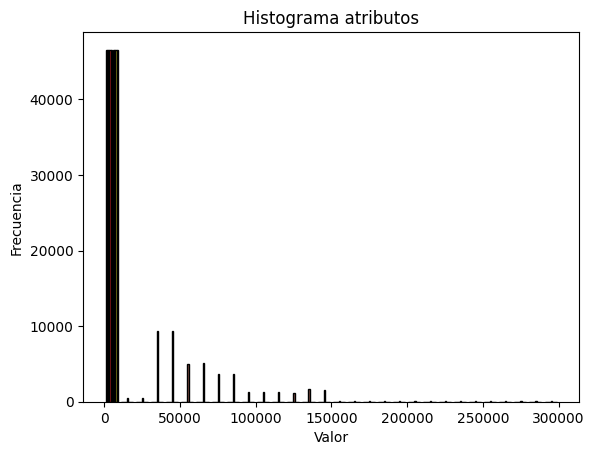

In [ ]:
plt.hist(df_atributos, bins=30, edgecolor='black')
plt.title('Histograma atributos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# Aplicando log(x) a las columnas seleccionadas
df_atributos_log = df_atributos.copy()
df_atributos_log[atributos] = df_atributos_log[atributos].apply(np.log1p)
df_atributos_log

,ocupacion,numero_hijos,genero,promocion,pais,ingreso_real,escolaridad,promedio_autos(aprox),estado,estado_civil
12,1.098612,0.000000,0.693147,3.688879,0.000000,10.187801,0.693147,0.693147,0.000000,0.693147
31,1.098612,0.693147,0.693147,2.772589,0.693147,9.963783,0.693147,1.098612,2.079442,0.000000
72,1.098612,0.000000,0.693147,3.828641,1.098612,9.525151,0.693147,0.693147,1.098612,0.693147
74,1.609438,0.000000,0.693147,3.433987,1.098612,9.481588,0.693147,0.693147,1.098612,0.000000
79,1.609438,0.000000,0.000000,3.737670,1.098612,9.424968,0.693147,0.693147,1.098612,0.693147
...,...,...,...,...,...,...,...,...,...,...
60423,1.386294,1.386294,0.000000,3.091042,0.693147,12.473964,1.098612,1.386294,2.079442,0.000000
60424,0.693147,0.693147,0.000000,2.944439,0.693147,12.158404,1.386294,1.098612,2.079442,0.000000
60425,1.386294,0.000000,0.693147,3.555348,0.693147,11.971027,1.386294,1.386294,0.693147,0.693147
60426,1.386294,1.098612,0.693147,0.000000,1.098612,12.471751,1.386294,1.098612,1.945910,0.000000


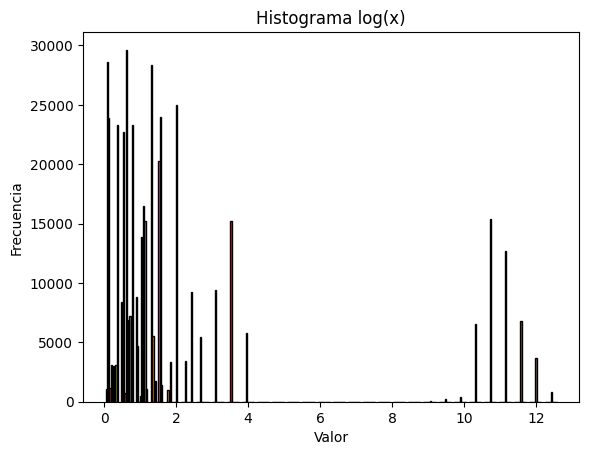

In [ ]:
plt.hist(df_atributos_log, bins=30, edgecolor='black')
plt.title('Histograma log(x)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# separar en entrenamiento y prueba
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(df_atributos_log, y, test_size=0.3, random_state=42)

In [ ]:
# estandarizar escala
ss_log = StandardScaler()

x_train_scaled_log = ss_log.fit_transform(X_train_log)
x_test_scaled_log = ss_log.transform(X_test_log)

In [ ]:
# buscar el mejor modelo SVM con log(x) estandarizado
best_model_svm_log, best_params_svm_log, tiempo_svm_log = search_best_model(x_train_scaled_log, y_train_log, svm, param_grid_svm)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 36 is smaller than n_iter=50. Running 36 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tiempo de ejecución: 8106.28 segundos


In [ ]:
best_model_svm_log

SVC(C=100, class_weight='balanced', degree=2)

In [ ]:
print(f"Mejor combinación de hiperparámetros: {best_params_svm_log}")

Mejor combinación de hiperparámetros: {'kernel': 'rbf', 'gamma': 'scale', 'degree': 2, 'class_weight': 'balanced', 'C': 100}


In [ ]:
best_svm_log = SVC(**best_params_svm_log, random_state=42)
accuracy_cvm_log, precision_cvm_log, recall_cvm_log, t_cvm_log = modelo_clasificacion(x_train_scaled_log, x_test_scaled_log, y_train, y_test, best_svm_log)

La Exactitud del modelo es: 88.70%
La Precisión del modelo es: 91.26%
La Sensibilidad del modelo es: 88.70%


- SVM log con OneVsRestClassifier()

In [ ]:
ovr_clf_log = OneVsRestClassifier(best_svm_log)
accuracy_cvm_log_ovr, precision_cvm_log_ovr, recall_cvm_log_ovr, t_cvm_log_ovr = modelo_clasificacion(x_train_scaled_log, x_test_scaled_log, y_train, y_test, ovr_clf_log)

La Exactitud del modelo es: 89.23%
La Precisión del modelo es: 90.97%
La Sensibilidad del modelo es: 89.23%


- SVM con OneVsOneClassifier()

In [ ]:
ovo_clf_log = OneVsOneClassifier(best_svm_log)
accuracy_cvm_log_ovo, precision_cvm_log_ovo, recall_cvm_log_ovo, t_cvm_log_ovo = modelo_clasificacion(x_train_scaled_log, x_test_scaled_log, y_train, y_test, ovo_clf_log)

La Exactitud del modelo es: 88.65%
La Precisión del modelo es: 91.27%
La Sensibilidad del modelo es: 88.65%


In [ ]:
metricas_df(accuracy_cvm_ovr, precision_cvm_ovr, recall_cvm_ovr, 'Máquinas de Soporte Vectorial (SVM)', t_cvm_ovr, tiempo_svm)

,Modelo,Exactitud,Precisión,Sensibilidad,Tiempo_ejecucion,Tiempo_busqueda_hiperparametros
0,Baseline DecisionTreeClassifier,95.16,95.18,95.16,0.29,0.30
1,DecisionTreeClassifier,96.05,96.03,96.05,0.28,13.46
2,RandomForestClassifier,96.85,96.83,96.85,3.47,232.08
3,Máquinas de Soporte Vectorial (SVM),90.44,91.97,90.44,239.64,6711.94


---

**Nota:**

Utilizando **RandomizedSearchCV**, **OneVsOneClassifier** y las variables estandarizadas, con los mejores hiperparámetros:

- `kernel`: 'rbf'
- `gamma`: 'scale'
- `degree`: 2
- `class_weight`: 'balanced'
- `C`: 100

El modelo **SVC()** alcanza una puntuación cercana al **90%** en las métricas de **exactitud (accuracy_score)**, **precisión (precision_score)** y **sensibilidad (recall_score)**.

- La mejor puntuación se obtiene **utilizando OneVsRestClassifier() y variables sin transformación logarítmica (log(x))**:
  - **Exactitud** del modelo: 90.44%
  - **Precisión** del modelo: 91.97%
  - **Sensibilidad** del modelo: 90.44%







**NO supera la baseline por alrededor de 5%.**

---

#### K-Nearest Neighbors (KNN)

In [ ]:
knn = KNeighborsClassifier()

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],                           # Número de vecinos a considerar
    'weights': ['uniform', 'distance'],                    # Ponderación de los vecinos
    'metric': ['euclidean', 'manhattan', 'minkowski'],     # Métrica para calcular la distancia
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'] # Algoritmo para computar los vecinos más cercanos
}

In [ ]:
best_model_knn, best_params_knn, tiempo_knn = search_best_model(x_train_scaled, y_train, knn, param_grid_knn)

Tiempo de ejecución: 338.94 segundos


In [ ]:
best_model_knn

KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=3,
                     weights='distance')

In [ ]:
print(f"Mejor combinación de hiperparámetros: {best_params_knn}")

Mejor combinación de hiperparámetros: {'weights': 'distance', 'n_neighbors': 3, 'metric': 'manhattan', 'algorithm': 'ball_tree'}


In [ ]:
best_knn = KNeighborsClassifier(**best_params_knn)
accuracy_knn, precision_knn, recall_knn, t_knn = modelo_clasificacion(x_train_scaled, x_test_scaled, y_train, y_test, best_knn)

La Exactitud del modelo es: 96.96%
La Precisión del modelo es: 96.96%
La Sensibilidad del modelo es: 96.96%


mejorando los parametros de **cv y n_iter en RandomizedSearchCV**


In [ ]:
best_model_knn, best_params_knn, tiempo_knn2 = search_best_model(x_train_scaled, y_train, knn, param_grid_knn, 5, 100)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 96 is smaller than n_iter=100. Running 96 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tiempo de ejecución: 762.06 segundos


In [ ]:
best_knn = KNeighborsClassifier(**best_params_knn)
accuracy_knn2, precision_knn2, recall_knn2, t_knn2 = modelo_clasificacion(x_train_scaled, x_test_scaled, y_train, y_test, best_knn)

La Exactitud del modelo es: 96.96%
La Precisión del modelo es: 96.96%
La Sensibilidad del modelo es: 96.96%


In [ ]:
metricas_df(accuracy_knn, precision_knn, recall_knn, 'K-Nearest Neighbors (KNN)', t_knn, tiempo_knn)

,Modelo,Exactitud,Precisión,Sensibilidad,Tiempo_ejecucion,Tiempo_busqueda_hiperparametros
0,Baseline DecisionTreeClassifier,95.16,95.18,95.16,0.29,0.30
1,DecisionTreeClassifier,96.05,96.03,96.05,0.28,13.46
2,RandomForestClassifier,96.85,96.83,96.85,3.47,232.08
3,Máquinas de Soporte Vectorial (SVM),90.44,91.97,90.44,239.64,6711.94
4,K-Nearest Neighbors (KNN),96.96,96.96,96.96,6.18,338.94


---

**Nota:**

Utilizando **RandomizedSearchCV** y las variables estandarizadas, con los mejores hiperparámetros:

- `weights`: 'distance'
- `n_neighbors`: 3
- `metric`: 'manhattan'
- `algorithm`: 'ball_tree'

El modelo **KNeighborsClassifier()** alcanza su mejor puntuación de aproximadamente **96.96%** en las métricas de **exactitud (accuracy_score)**, **precisión (precision_score)** y **sensibilidad (recall_score)**. Aunque se ajustaron los parámetros de búsqueda y el número de iteraciones, los resultados se mantuvieron iguales.

**Mejores puntuaciones obtenidas:**
- **Exactitud** del modelo: 96.96%
- **Precisión** del modelo: 96.96%
- **Sensibilidad** del modelo: 96.96%

**Supera la baseline por alrededor de 1.70%.**

---

#### Gradient Boosting (GBM)

In [ ]:
gbm = GradientBoostingClassifier()

param_grid_gbm = {
    'n_estimators': [20, 50, 100],     # Número de árboles a generar
    'learning_rate': [0.01, 0.1, 0.2], # Tasa de aprendizaje
    'max_depth': [3, 5, 7],            # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],   # Número mínimo de muestras necesarias para dividir un nodo
    'min_samples_leaf': [1, 2, 4],     # Número mínimo de muestras en una hoja
    'subsample': [0.8, 0.9, 1.0],      # Fracción de muestras utilizadas para entrenar cada árbol
    'max_features': ['sqrt', 'log2']   # Número de características a considerar en cada división
}

In [ ]:
best_model_gbm, best_params_gbm, tiempo_gbm = search_best_model(x_train_scaled, y_train, gbm, param_grid_gbm)

Tiempo de ejecución: 541.7 segundos


In [ ]:
best_model_gbm

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, max_features='sqrt',
                           min_samples_split=10, subsample=0.8)

In [ ]:
print(f"Mejor combinación de hiperparámetros: {best_params_gbm}")

Mejor combinación de hiperparámetros: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.2}


In [ ]:
best_gbm = GradientBoostingClassifier(**best_params_gbm, random_state=42)
accuracy_gbm, precision_gbm, recall_gbm, t_gbm = modelo_clasificacion(x_train_scaled, x_test_scaled, y_train, y_test, best_gbm)

La Exactitud del modelo es: 93.54%
La Precisión del modelo es: 93.70%
La Sensibilidad del modelo es: 93.54%


mejorando los parametros de **cv y n_iter en RandomizedSearchCV**

In [ ]:
best_model_gbm, best_params_gbm, tiempo_gbm2 = search_best_model(x_train_scaled, y_train, gbm, param_grid_gbm, 5, 100)

Tiempo de ejecución: 2128.53 segundos


In [ ]:
best_gbm = GradientBoostingClassifier(**best_params_gbm, random_state=42)
accuracy_gbm2, precision_gbm2, recall_gbm2, t_gbm2 = modelo_clasificacion(x_train_scaled, x_test_scaled, y_train, y_test, best_gbm)

La Exactitud del modelo es: 93.54%
La Precisión del modelo es: 93.70%
La Sensibilidad del modelo es: 93.54%


In [ ]:
metricas_df(accuracy_gbm, precision_gbm, recall_gbm, 'Gradient Boosting (GBM)', t_gbm, tiempo_gbm)

,Modelo,Exactitud,Precisión,Sensibilidad,Tiempo_ejecucion,Tiempo_busqueda_hiperparametros
0,Baseline DecisionTreeClassifier,95.16,95.18,95.16,0.29,0.30
1,DecisionTreeClassifier,96.05,96.03,96.05,0.28,13.46
2,RandomForestClassifier,96.85,96.83,96.85,3.47,232.08
3,Máquinas de Soporte Vectorial (SVM),90.44,91.97,90.44,239.64,6711.94
4,K-Nearest Neighbors (KNN),96.96,96.96,96.96,6.18,338.94
5,Gradient Boosting (GBM),93.54,93.70,93.54,13.66,541.70


---
**Nota:**

Utilizando **RandomizedSearchCV** y las variables estandarizadas, con los mejores hiperparámetros:

- `subsample`: 0.8
- `n_estimators`: 100
- `min_samples_split`: 10
- `min_samples_leaf`: 1
- `max_features`: 'sqrt'
- `max_depth`: 7
- `learning_rate`: 0.2

El modelo **GradientBoostingClassifier()** alcanza su mejor puntuación de aproximadamente **93.54%** en las métricas de **exactitud (accuracy_score)**, **precisión (precision_score)** y **sensibilidad (recall_score)**. A pesar de aumentar los parámetros de búsqueda y el número de iteraciones, los resultados se mantuvieron constantes.

**Mejores puntuaciones obtenidas:**
- **Exactitud** del modelo: 93.54%
- **Precisión** del modelo: 93.70%
- **Sensibilidad** del modelo: 93.54%

**NO supera la baseline por alrededor de 1.60%.**

---

#### Red Neuronal Artificial (MLPClassifier)

In [ ]:
mlpclassifier = MLPClassifier()

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,)], # Tamaño y número de capas ocultas
    'activation': ['tanh', 'relu'],        # Función de activación
    'solver': ['adam'],                    # Algoritmo para optimizar la red
    'alpha': [1e-3, 0.001],                # Parámetro de regularización
    'learning_rate': ['constant', 'adaptive'],  # Tasa de aprendizaje
    'max_iter': [50, 100, 200],            # Número máximo de iteraciones para el entrenamiento del modelo.
    'tol': [1e-4, 1e-3],                   # Criterio de tolerancia para detener el entrenamiento si la mejora es menor que este valor.
    'batch_size': ['auto']                 # Número de muestras por batch durante el entrenamiento
}

In [ ]:
best_model_mlp, best_params_mlp, tiempo_mlp = search_best_model(x_train_scaled, y_train, mlpclassifier, param_grid_mlp)

Tiempo de ejecución: 2223.38 segundos


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
best_model_mlp

MLPClassifier(activation='tanh', alpha=0.001)

In [ ]:
print(f"Mejor combinación de hiperparámetros: {best_params_mlp}")

Mejor combinación de hiperparámetros: {'tol': 0.0001, 'solver': 'adam', 'max_iter': 200, 'learning_rate': 'constant', 'hidden_layer_sizes': (100,), 'batch_size': 'auto', 'alpha': 0.001, 'activation': 'tanh'}


In [ ]:
best_mlp = MLPClassifier(**best_params_mlp, random_state=42)
accuracy_mlp, precision_mlp, recall_mlp, t_mlp = modelo_clasificacion(x_train_scaled, x_test_scaled, y_train, y_test, best_mlp)

La Exactitud del modelo es: 90.11%
La Precisión del modelo es: 89.76%
La Sensibilidad del modelo es: 90.11%


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
metricas_df(accuracy_mlp, precision_mlp, recall_mlp, 'Red Neuronal Artificial (MLPClassifier)', t_mlp, tiempo_mlp)

,Modelo,Exactitud,Precisión,Sensibilidad,Tiempo_ejecucion,Tiempo_busqueda_hiperparametros
0,Baseline DecisionTreeClassifier,95.16,95.18,95.16,0.29,0.30
1,DecisionTreeClassifier,96.05,96.03,96.05,0.28,13.46
2,RandomForestClassifier,96.85,96.83,96.85,3.47,232.08
3,Máquinas de Soporte Vectorial (SVM),90.44,91.97,90.44,239.64,6711.94
4,K-Nearest Neighbors (KNN),96.96,96.96,96.96,6.18,338.94
5,Gradient Boosting (GBM),93.54,93.70,93.54,13.66,541.70
6,Red Neuronal Artificial (MLPClassifier),90.11,89.76,90.11,74.51,2223.38


In [ ]:
modelo_metricas.to_csv('/content/drive/MyDrive/Data_Science/Bootcamp Data Science/Challenge/ESENCIA DEL CLIENTE /modelo_metricas.csv', index=False)

---

**Nota:**

Utilizando **RandomizedSearchCV** y las variables estandarizadas, con los mejores hiperparámetros para el modelo **MLPClassifier()**:

- `tol`: 0.0001
- `solver`: 'adam'
- `max_iter`: 200
- `learning_rate`: 'constant'
- `hidden_layer_sizes`: (100,)
- `batch_size`: 'auto'
- `alpha`: 0.001
- `activation`: 'tanh'

El modelo **MLPClassifier()** alcanza su mejor puntuación de aproximadamente **90.11%** en las métricas de **exactitud (accuracy_score)**, **precisión (precision_score)** y **sensibilidad (recall_score)**.

**Mejores puntuaciones obtenidas:**
- **Exactitud** del modelo: 90.11%
- **Precisión** del modelo: 89.76%
- **Sensibilidad** del modelo: 90.11%

**NO supera la baseline por alrededor de 5%.**

---

In [ ]:
df_modelo_metricas = pd.read_csv('/content/drive/MyDrive/Data_Science/Bootcamp Data Science/Challenge/ESENCIA DEL CLIENTE /modelo_metricas.csv')

#### **Conclusiones de la Experimentación de Modelos**

In [ ]:
df_modelo_metricas= df_modelo_metricas.set_index('Modelo')

# Seleccionar las métricas del modelo base
modelo_base = df_modelo_metricas.loc['Baseline DecisionTreeClassifier']

# Función para agregar una línea divisoria debajo del modelo base
def add_divider(s):
    if s.name == 'Baseline DecisionTreeClassifier':
        return ['border-bottom: 2px solid black' for _ in s]
    return ['' for _ in s]

# Función para resaltar las métricas que superen al modelo base
def highlight_above_base(s):
    return [
        'color: blue' if (s[i] > modelo_base[i] and i in ['Exactitud', 'Precisión', 'Sensibilidad']) else ''
        for i in s.index
    ]

# Función para resaltar de verde los valores máximos en las métricas Exactitud, Precisión, Sensibilidad
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: lightgreen' if v else '' for v in is_max]

# Función para resaltar en azul el texto de los tres valores más cercanos al valor de la baseline en Tiempo_ejecucion
def highlight_closest_to_base(df, column_name):
    base_value = df.loc['Baseline DecisionTreeClassifier', column_name]
    distances = (df[column_name] - base_value).abs()
    distances = distances[distances != 0]  # Excluir el valor de la línea base
    closest_indices = distances.nsmallest(3).index
    return ['color: blue' if i in closest_indices else '' for i in df.index]

# Función para resaltar de verde el valor más cercano a la baseline en Tiempo_ejecucion
def highlight_nearest_to_base(df, column_name):
    base_value = df.loc['Baseline DecisionTreeClassifier', column_name]
    distances = (df[column_name] - base_value).abs()
    distances = distances[distances != 0]  # Excluir el valor de la línea base
    nearest_index = distances.idxmin()  # Índice del valor más cercano
    return ['background-color: lightgreen' if i == nearest_index else '' for i in df.index]

# Aplicar los estilos y el formato para todas las métricas y tiempos
styled_df = df_modelo_metricas.style.apply(add_divider, axis=1)\
                                    .apply(highlight_above_base, axis=1)\
                                    .apply(highlight_max, subset=['Exactitud', 'Precisión', 'Sensibilidad'])\
                                    .apply(lambda s: highlight_closest_to_base(df_modelo_metricas, 'Tiempo_ejecucion'), subset=['Tiempo_ejecucion'])\
                                    .apply(lambda s: highlight_nearest_to_base(df_modelo_metricas, 'Tiempo_ejecucion'), subset=['Tiempo_ejecucion'])\
                                    .format({
                                        'Exactitud': '{:.2f}%',
                                        'Precisión': '{:.2f}%',
                                        'Sensibilidad': '{:.2f}%',
                                        'Tiempo_ejecucion': '{:.2f} seg',
                                        'Tiempo_busqueda_hiperparametros': '{:.2f} seg'
                                    })

# Mostrar el DataFrame estilizado
styled_df

,Exactitud,Precisión,Sensibilidad,Tiempo_ejecucion,Tiempo_busqueda_hiperparametros
Modelo,,,,,
Baseline DecisionTreeClassifier,95.16%,95.18%,95.16%,0.29 seg,0.30 seg
DecisionTreeClassifier,96.05%,96.03%,96.05%,0.28 seg,13.46 seg
RandomForestClassifier,97.11%,97.09%,97.11%,4.56 seg,222.18 seg
Máquinas de Soporte Vectorial (SVM),90.44%,91.97%,90.44%,239.64 seg,6711.94 seg
K-Nearest Neighbors (KNN),96.96%,96.96%,96.96%,6.18 seg,338.94 seg
Gradient Boosting (GBM),93.54%,93.70%,93.54%,13.66 seg,541.70 seg
Red Neuronal Artificial (MLPClassifier),90.11%,89.76%,90.11%,74.51 seg,2223.38 seg


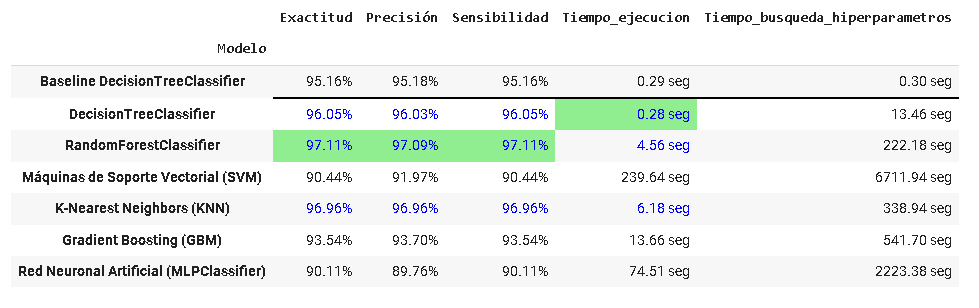


- **Línea Divisoria Negra**: Agrega una línea divisoria debajo de la fila del modelo base para destacarla visualmente.

- **Color Verde**: Resalta el **Tiempo de Ejecución** más cercano al valor de la baseline, así como las métricas de **Exactitud**, **Precisión** y **Sensibilidad** que superan los valores de la baseline.

- **Color Azul**: Resalta los tres valores de **Tiempo de Ejecución** más cercanos al valor de la baseline, excluyendo el valor de la baseline misma.

- **Color Azul (Métricas)**: Resalta las métricas de **Exactitud**, **Precisión** y **Sensibilidad** que son superiores a las del modelo base.

**Conclusión:**

- **Bosques Aleatorios (`Random Forest`)** y **K-Nearest Neighbors (`KNN`)** ofrecen la mejor precisión y exactitud, superando la línea base en todas las métricas. Sin embargo, **KNN** tiene el tiempo de ejecución más largo, lo cual puede ser un inconveniente si se tuvieran muchos datos.
- El **Árbol de Decisión** también mejora respecto al modelo base, pero con menos precisión que los modelos avanzados y un tiempo de ejecución mucho menor.
- **Bosques Aleatorios** es el mejor en términos de precisión y exactitud, pero si el tiempo de procesamiento es crítico, el **Árbol de Decisión** podría ser la opción más eficiente.

---

#6. Modelo para la clasificación de clientes

Dado el tamaño de nuestro conjunto de datos, que cuenta con poco más de 60,000 registros, y considerando que solo necesitamos clasificar a 13,867 clientes en las categorías de bronce, plata u oro, se ha decidido utilizar el modelo de **Bosques Aleatorios (`Random Forest`)** para la clasificación multiclase. Esta elección se basa en el equilibrio entre su rendimiento en las métricas de evaluación y su tiempo de ejecución, lo cual es adecuado para nuestro conjunto de datos.

In [47]:
df_copy = datos.copy()

In [48]:
df = df_copy[atributos]
df = pd.concat([df, df_copy['miembro']], axis=1)

In [49]:
df.shape

(60428, 11)

In [50]:
# Separar las filas con valores nulos en 'miembro'
df_no_null = df.dropna(subset=['miembro'])
df_null = df[df['miembro'].isna()]

In [51]:
df_no_null.shape, df_null.shape

((46561, 11), (13867, 11))

In [52]:
def conv_le(df):
    """
    Convierte todas las columnas de tipo 'object' en un DataFrame a etiquetas numéricas utilizando LabelEncoder.

    Parámetros:
    -----------
    df : pandas.DataFrame
        El DataFrame de entrada que contiene las columnas a transformar.

    Devuelve:
    ---------
    pandas.DataFrame
        El DataFrame original con las columnas de tipo 'object' convertidas a valores numéricos mediante LabelEncoder.

    Detalles:
    ---------
    Esta función selecciona todas las columnas del DataFrame que son de tipo 'object' (normalmente texto o categorías)
    y aplica un codificador de etiquetas (LabelEncoder) a cada una de esas columnas. El LabelEncoder transforma las
    etiquetas de texto en valores numéricos, asignando un número entero único a cada etiqueta diferente.

    Ejemplo de uso:
    ---------------
    >>> import pandas as pd
    >>> from sklearn.preprocessing import LabelEncoder

    >>> data = {'col1': ['rojo', 'azul', 'rojo'], 'col2': ['grande', 'pequeño', 'mediano']}
    >>> df = pd.DataFrame(data)

    >>> le = LabelEncoder()  # Asegúrate de tener una instancia de LabelEncoder

    >>> df = conv_le(df)
    >>> print(df)
       col1  col2
    0     1     1
    1     0     2
    2     1     0
    """
    col_obj = df.select_dtypes(include='object')

    # Aplicar el LabelEncoder a cada columna de tipo object
    for columna in col_obj.columns:
        df[columna] = label_encoder.fit_transform(df[columna])

    return df

***Nota:***
*Primero utilizar `LabelEncoder()` en X, ya que `LabelEncoder` no puede "recordar" diferentes conjuntos de clases para distintas columnas.*

In [53]:
# Separar características y etiquetas
X_no_null = df_no_null.drop(columns=['miembro'])
X_null = df_null.drop(columns=['miembro'])

X_no_null = conv_le(X_no_null)
X_null = conv_le(X_null)

In [54]:
# Codificar las etiquetas de clase en los datos sin valores nulos
y_non_null = label_encoder.fit_transform(df_no_null['miembro'])

In [55]:
# mejores hiperparámetros encontrados para el modelo de random fores
mejores_parametros_rf={'n_estimators': 25, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None, 'bootstrap': False}

In [56]:
# Entrenar el modelo con los datos sin valores nulos
model = RandomForestClassifier(**mejores_parametros_rf, random_state=42)
model.fit(x_train, y_train)

# Predecir las etiquetas para las filas con valores nulos
y_null_pred = model.predict(X_null)

In [57]:
# Verificar las clases del LabelEncoder
print("Clases conocidas por el LabelEncoder:", label_encoder.classes_)

# Ver las clases predichas por el modelo
print("Clases predichas:", np.unique(y_null_pred))

Clases conocidas por el LabelEncoder: ['Bronce' 'Oro' 'Plata']
Clases predichas: [0 1 2]


---

## Clasificando los clientes

clasificar a 13,867 clientes en las **categorías de bronce, plata u oro**

In [58]:
# Reemplazar los valores nulos en el DataFrame copia del original con las predicciones
df_copy.loc[df_copy['miembro'].isna(), 'miembro'] = label_encoder.inverse_transform(y_null_pred)

In [59]:
# guardar df final
df_copy.to_csv('/content/drive/MyDrive/Data_Science/Bootcamp Data Science/Challenge/ESENCIA DEL CLIENTE /df_tienda_final.csv', index=False)

In [60]:
df_tienda_final = pd.read_csv('/content/drive/MyDrive/Data_Science/Bootcamp Data Science/Challenge/ESENCIA DEL CLIENTE /df_tienda_final.csv')

In [61]:
df_tienda_final.miembro.isna().sum()

0

In [62]:
df_tienda_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   categoria_alimento             60428 non-null  object 
 1   departamento                   60428 non-null  object 
 2   tipo                           60428 non-null  object 
 3   ventas_tienda(en millones)     60428 non-null  float64
 4   costo_tienda(en millones)      60428 non-null  float64
 5   ventas_unitarias(en millones)  60428 non-null  float64
 6   promocion                      60428 non-null  object 
 7   pais                           60428 non-null  object 
 8   estado_civil                   60428 non-null  object 
 9   genero                         60428 non-null  object 
 10  total_de_hijos                 60428 non-null  float64
 11  escolaridad                    60428 non-null  object 
 12  miembro                        60428 non-null 

In [63]:
# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)

In [64]:
df_tienda_final.sample(5)

,categoria_alimento,departamento,tipo,ventas_tienda(en millones),costo_tienda(en millones),ventas_unitarias(en millones),promocion,pais,estado_civil,genero,total_de_hijos,escolaridad,miembro,ocupacion,vivienda_propia,promedio_autos(aprox),ingreso_anual,numero_hijos,promedio_autos(aprox).1,marca,precio_recomendado,peso_bruto,peso_neto,empaque_reciclable,bajo_en_grasa,unidades_por_caja,comercio,ciudad,estado,pies_cuadrados_tienda,pies_cuadrados_comestibles,pies_cuadrados_congelados,pies_cuadrados_carne,cafeteria,tienda_de_videos,barra_de_ensaladas,comida_preparada,floristeria,divulgacion,costo,ingreso_real
7566,Vegetales,Alimentos congelados,Comida,7.56,3.1752,4.0,Aplastadores de precios,Canadá,Casado,Femenino,4.0,Primaria,Bronce,Obrero,Sí,0.0,20000,3.0,0.0,Imagine,1.89,17.10,15.10,0.0,1.0,26.0,Supermercado de lujo,Vancouver,BC,23112.0,16418.0,4016.0,2678.0,1.0,1.0,1.0,1.0,1.0,Panfletos,95.45,29751
17557,Productos de papel,Artículos para el hogar,No comestible,5.18,2.0202,2.0,Super Ahorradores,Estados Unidos,Casado,Femenino,4.0,Secundaria,Bronce,Obrero,No,4.0,40000,1.0,4.0,Sunset,2.59,9.43,7.43,0.0,0.0,20.0,Supermercado de lujo,Tacoma,WA,33858.0,22123.0,7041.0,4694.0,1.0,0.0,1.0,1.0,1.0,Periódico dominical,69.65,46271
10037,Analgésicos,Salud e higiene,No comestible,11.32,3.6224,4.0,Espectacular de cupones,Estados Unidos,Soltero,Femenino,5.0,Primaria,Oro,Obrero,Sí,1.0,20000,0.0,1.0,Steady,2.83,11.80,9.80,1.0,0.0,18.0,Supermercado,Bremerton,WA,39696.0,24390.0,9184.0,6122.0,0.0,0.0,1.0,1.0,0.0,Televisión,51.47,22254
6119,Alimentos para el desayuno,Alimentos para el desayuno,Comida,6.04,2.1744,4.0,Especial luz verde,Canadá,Casado,Femenino,4.0,Primaria,Bronce,Obrero,Sí,1.0,20000,4.0,1.0,Best,1.51,19.10,18.10,1.0,0.0,29.0,Supermercado mediano,Victoria,BC,34452.0,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,"Periódico diario, radio",147.17,15378
37451,Analgésicos,Salud e higiene,No comestible,9.52,4.1888,4.0,Lotería de la caja registradora,Estados Unidos,Soltero,Masculino,5.0,Técnico,Bronce,Técnico,Sí,2.0,60000,0.0,2.0,Bird Call,2.38,19.00,17.00,1.0,0.0,16.0,Supermercado de lujo,Salem,OR,27694.0,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Periódico diario, radio, televisión",55.59,67515


Los 13,867 clientes han sido exitosamente clasificados en alguna de las tres membresías: Bronce, Plata u Oro.

Los directores de Universal Food han logrado asignar una membresía a todos sus clientes, asegurando así que disfruten de la mejor experiencia al visitar sus supermercados. Esta iniciativa ha permitido personalizar el servicio ofrecido y brindar ventajas exclusivas a los miembros, fortaleciendo la relación con los clientes y fomentando su fidelidad. Mediante esta estrategia, Universal Food ha demostrado su compromiso con la satisfacción del cliente y su capacidad para adaptarse a las necesidades y preferencias de cada individuo.